# Predicting Solar Energy Production

## Capstone Project

### Alberta Machine Learning Institute (Amii)

#### Project Objective:
Analyzing the performance of two solar power plants based on data gathered at the inverters level, in addition to the local weather data, in order to build a model that predicts the energy yield.

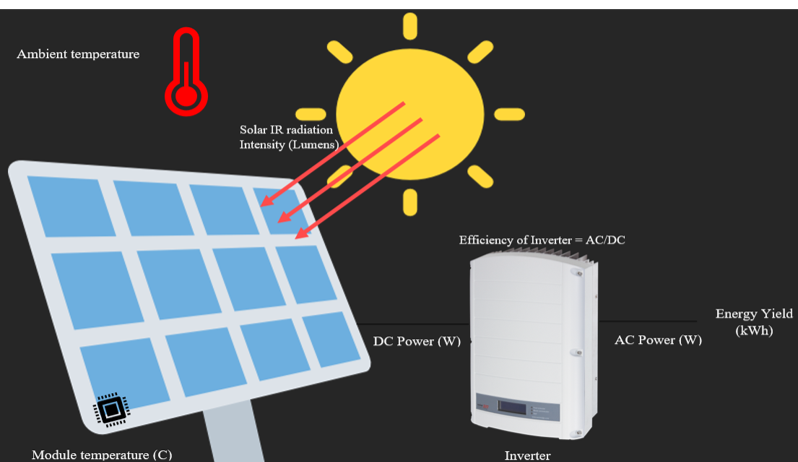

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Import Data

#### Plant Data:

In [2]:
plant_1 = pd.read_csv('Plant_1_Generation_Data.csv', parse_dates=['DATE_TIME'])
plant_1.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  
0    6259559.0  
1    6183645.0  
2    6987759.0  
3    7602960.0  
4    7158964.0

In [3]:
plant_2 = pd.read_csv('Plant_2_Generation_Data.csv', parse_dates=['DATE_TIME'])
plant_2.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4136001  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
1 2020-05-15   4136001  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
2 2020-05-15   4136001  9kRcWv60rDACzjR       0.0       0.0  3075.333333   
3 2020-05-15   4136001  Et9kgGMDl729KT4       0.0       0.0   269.933333   
4 2020-05-15   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   

    TOTAL_YIELD  
0  2.429011e+06  
1  1.215279e+09  
2  2.247720e+09  
3  1.704250e+06  
4  1.994153e+07

#### Fixing the AC Power Data to match DC Power Data

In [4]:
plant_1['DC_POWER'] = plant_1['DC_POWER'] / 10

#### Weather Data:

In [5]:
weather_1 = pd.read_csv('Plant_1_Weather_Sensor_Data.csv', parse_dates=['DATE_TIME'])
weather_2 = pd.read_csv('Plant_2_Weather_Sensor_Data.csv', parse_dates=['DATE_TIME'])

#### Merging Data:

In [6]:
plants = pd.concat([plant_1, plant_2], axis= 0, ignore_index = 'True')
weather = pd.concat([weather_1, weather_2], axis= 0, ignore_index = 'True')

In [7]:
df = plants.merge(weather, on=['DATE_TIME', 'PLANT_ID'], how = 'inner')
df.head()

DATE_TIME  PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0    6259559.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
1    6183645.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
2    6987759.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
3    7602960.0  HmiyD2TTLFNqkNe            25.184316           22.857507   
4    7158964.0  HmiyD2TTLFNqkNe            25.184316           22.857507   

   IRRADIATION  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

## Exploratory Data Analysis

In [8]:
df.shape

(136472, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136472 entries, 0 to 136471
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE_TIME            136472 non-null  datetime64[ns]
 1   PLANT_ID             136472 non-null  int64         
 2   SOURCE_KEY_x         136472 non-null  object        
 3   DC_POWER             136472 non-null  float64       
 4   AC_POWER             136472 non-null  float64       
 5   DAILY_YIELD          136472 non-null  float64       
 6   TOTAL_YIELD          136472 non-null  float64       
 7   SOURCE_KEY_y         136472 non-null  object        
 8   AMBIENT_TEMPERATURE  136472 non-null  float64       
 9   MODULE_TEMPERATURE   136472 non-null  float64       
 10  IRRADIATION          136472 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 12.5+ MB


In [10]:
df.describe()

PLANT_ID       DC_POWER       AC_POWER    DAILY_YIELD  \
count  1.364720e+05  136472.000000  136472.000000  136472.000000   
mean   4.135497e+06     280.977985     274.790259    3295.366192   
std    4.999863e+02     389.077816     380.180214    3035.313217   
min    4.135001e+06       0.000000       0.000000       0.000000   
25%    4.135001e+06       0.000000       0.000000      28.285714   
50%    4.135001e+06       3.613810       3.493095    2834.642857   
75%    4.136001e+06     543.321429     532.568571    5992.000000   
max    4.136001e+06    1447.112500    1410.950000    9873.000000   

        TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE    IRRADIATION  
count  1.364720e+05        136472.000000       136472.000000  136472.000000  
mean   3.303916e+08            26.763066           31.920744       0.230767  
std    6.085769e+08             3.897340           11.803674       0.305652  
min    0.000000e+00            20.398505           18.140415       0.000000  
25%    6.520020e+06            23.637604           22.411698       0.000000  
50%    7.269333e+06            25.908122           26.413755       0.026213  
75%    2.826096e+08            29.266583           40.778583       0.442961  
max    2.247916e+09            39.181638           66.635953       1.221652

In [11]:
df.duplicated().any().sum()

0

In [12]:
df.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [13]:
df.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')

<AxesSubplot:>

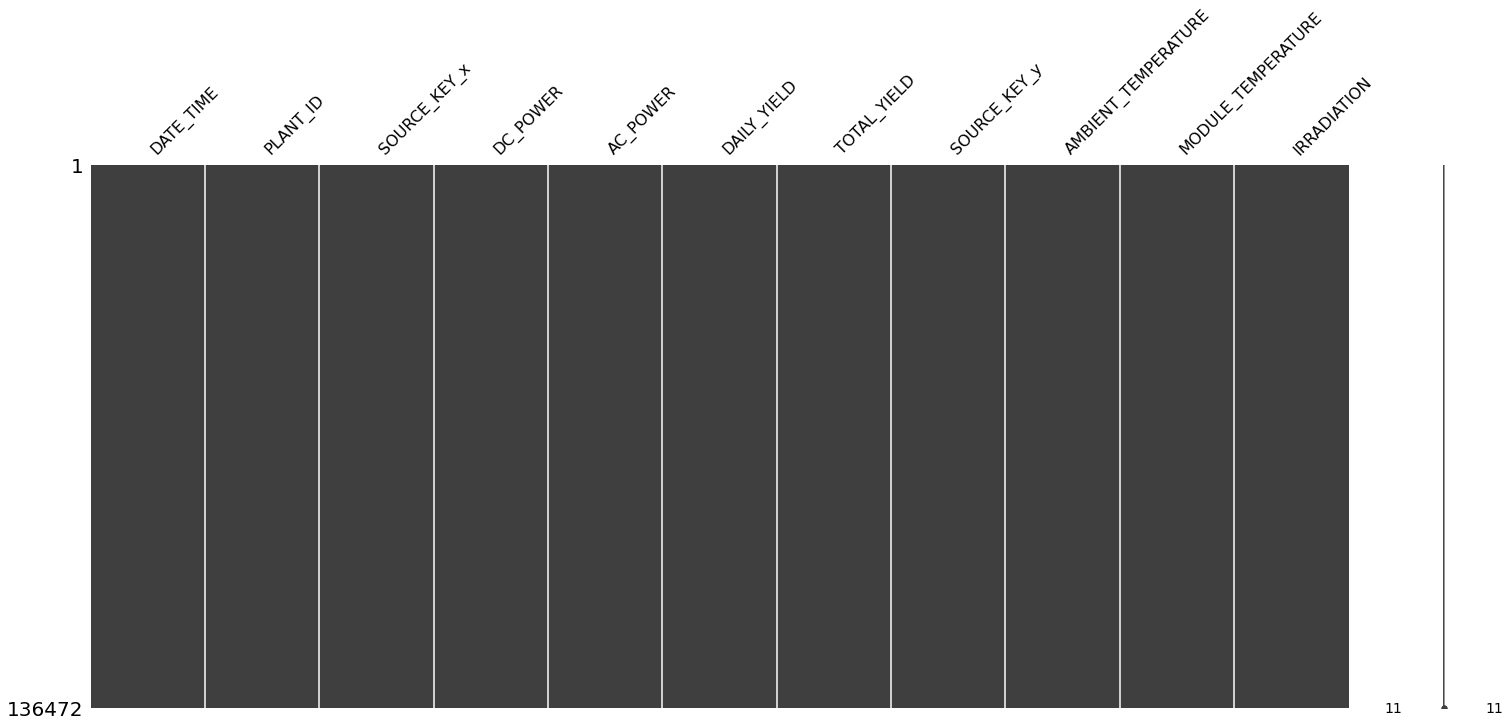

In [14]:
import missingno as msno
msno.matrix(df)

### Feature Engineering

#### Creating New Features

In [15]:
df['PLANT_EFFICIENCY'] = df['AC_POWER'] / df['DC_POWER']
df['PLANT_EFFICIENCY'].describe()

count    68859.000000
mean         0.977011
std          0.004795
min          0.912790
25%          0.975489
50%          0.978443
75%          0.980197
max          1.065922
Name: PLANT_EFFICIENCY, dtype: float64

In [16]:
df['PLANT_EFFICIENCY'].replace(np.nan, 0, inplace = True)

In [17]:
df.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
PLANT_EFFICIENCY       0
dtype: int64

In [18]:
df.sort_values(by=['DATE_TIME'], inplace= True, ignore_index=True)

In [19]:
df.head()

DATE_TIME  PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0     0.000000   
1 2020-05-15   4136001  Et9kgGMDl729KT4       0.0       0.0   269.933333   
2 2020-05-15   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   
3 2020-05-15   4136001  LYwnQax7tkwH5Cb       0.0       0.0  1872.500000   
4 2020-05-15   4136001  LlT2YUhhzqhg5Sw       0.0       0.0  1094.357143   

    TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0  6.259559e+06  HmiyD2TTLFNqkNe            25.184316           22.857507   
1  1.704250e+06  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
2  1.994153e+07  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
3  1.794959e+09  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
4  2.825928e+08  iq8k7ZNt4Mwm3w0            27.004764           25.060789   

   IRRADIATION  PLANT_EFFICIENCY  
0          0.0               0.0  
1          0.0               0.0  
2          0.0               0.0  
3          0.0               0.0  
4          0.0               0.0

In [20]:
df.tail()

DATE_TIME  PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  \
136467 2020-06-17 23:45:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
136468 2020-06-17 23:45:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
136469 2020-06-17 23:45:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
136470 2020-06-17 23:45:00   4135001  ZoEaEvLYb1n2sOq       0.0       0.0   
136471 2020-06-17 23:45:00   4136001  xoJJ8DcxJEcupym       0.0       0.0   

        DAILY_YIELD  TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  \
136467       6052.0    7237425.0  HmiyD2TTLFNqkNe            21.909288   
136468       6034.0    6433566.0  HmiyD2TTLFNqkNe            21.909288   
136469       5521.0    6485319.0  HmiyD2TTLFNqkNe            21.909288   
136470       5871.0    7341753.0  HmiyD2TTLFNqkNe            21.909288   
136471       4316.0  209335741.0  iq8k7ZNt4Mwm3w0            23.202871   

        MODULE_TEMPERATURE  IRRADIATION  PLANT_EFFICIENCY  
136467           20.427972          0.0               0.0  
136468           20.427972          0.0               0.0  
136469           20.427972          0.0               0.0  
136470           20.427972          0.0               0.0  
136471           22.535908          0.0               0.0

In [21]:
df.shape

(136472, 12)

In [22]:
ENERGY_PRODUCTION = []

for i in range(1, len(df.DAILY_YIELD)):
    element =  abs(df.DAILY_YIELD[i] - df.DAILY_YIELD[i-1])
    ENERGY_PRODUCTION.append(element)
    
len(ENERGY_PRODUCTION)
ENERGY_PRODUCTION.append(0)
len(ENERGY_PRODUCTION)
ENERGY_PRODUCTION[0] = 0
df['YIELD'] = ENERGY_PRODUCTION

for i in range(1, len(df.YIELD)):
    if df.YIELD[i] == df.YIELD[i-1]:
        df.YIELD[i-1] = 0
        
df.head()

DATE_TIME  PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0     0.000000   
1 2020-05-15   4136001  Et9kgGMDl729KT4       0.0       0.0   269.933333   
2 2020-05-15   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   
3 2020-05-15   4136001  LYwnQax7tkwH5Cb       0.0       0.0  1872.500000   
4 2020-05-15   4136001  LlT2YUhhzqhg5Sw       0.0       0.0  1094.357143   

    TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0  6.259559e+06  HmiyD2TTLFNqkNe            25.184316           22.857507   
1  1.704250e+06  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
2  1.994153e+07  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
3  1.794959e+09  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
4  2.825928e+08  iq8k7ZNt4Mwm3w0            27.004764           25.060789   

   IRRADIATION  PLANT_EFFICIENCY        YIELD  
0          0.0               0.0     0.000000  
1          0.0               0.0  2907.066667  
2          0.0               0.0  1304.500000  
3          0.0               0.0   778.142857  
4          0.0               0.0  4597.842857

In [23]:
df[df['YIELD'] < 0]['YIELD'] = 0

In [24]:
df.PLANT_ID.unique()

array([4135001, 4136001], dtype=int64)

In [25]:
df[df.PLANT_ID == 0.0]['PLANT_ID'].count()

0

In [26]:
df['PLANT_ID'].replace(4135001, 'Plant1', inplace = True)
df['PLANT_ID'].replace(4136001, 'Plant2', inplace = True)

In [27]:
df['PLANT_ID'].astype('category')

0         Plant1
1         Plant2
2         Plant2
3         Plant2
4         Plant2
           ...  
136467    Plant1
136468    Plant1
136469    Plant1
136470    Plant1
136471    Plant2
Name: PLANT_ID, Length: 136472, dtype: category
Categories (2, object): ['Plant1', 'Plant2']

### Exploratory Data Analysis

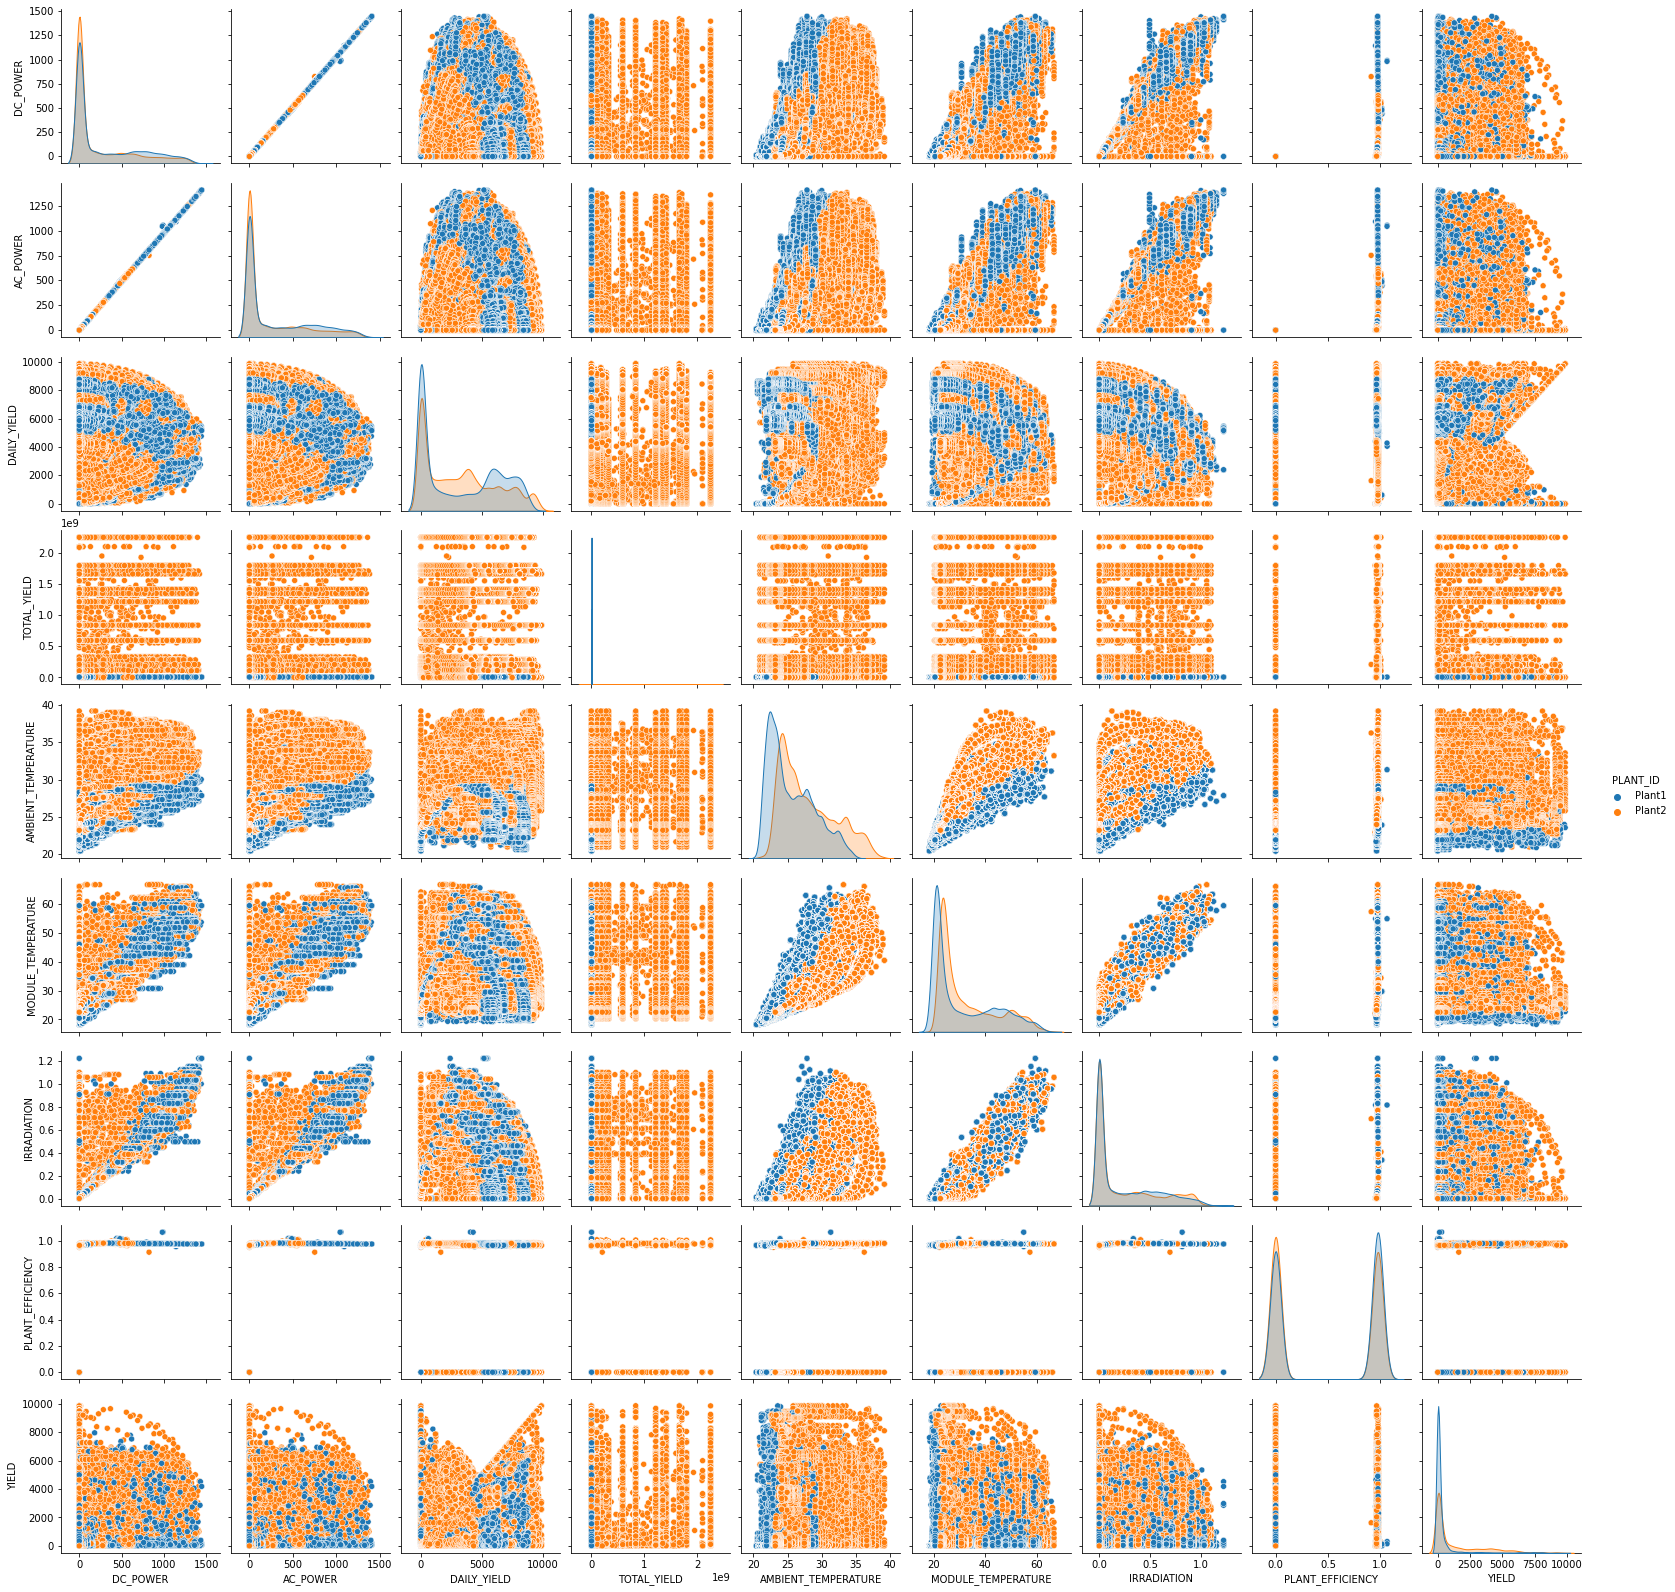

In [37]:
sns.pairplot(df, hue = 'PLANT_ID')
plt.savefig('Pairplot.png')

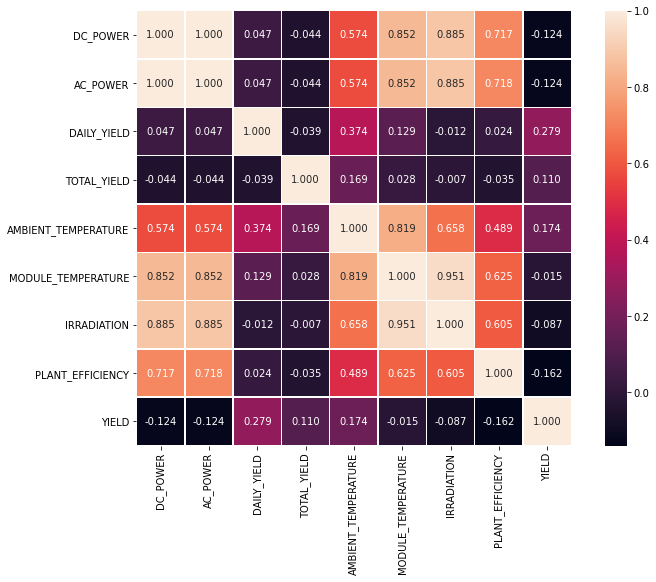

In [28]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(df.corr(method='pearson'), robust=True, annot=True, fmt='0.3f', linewidths=.5, square=True)

### Investigating the Modular Temperature

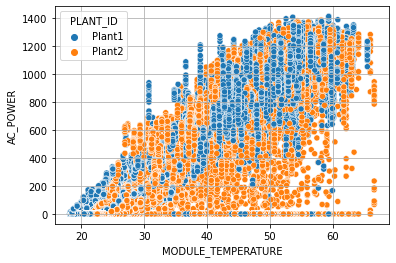

In [30]:
g = sns.scatterplot(x = 'MODULE_TEMPERATURE', y = 'AC_POWER', data = df, hue = 'PLANT_ID')
plt.grid()
plt.show()

In [31]:
df['PLANT_ID'].unique()

array(['Plant1', 'Plant2'], dtype=object)

Text(0.5, 0, 'AC_POWER')

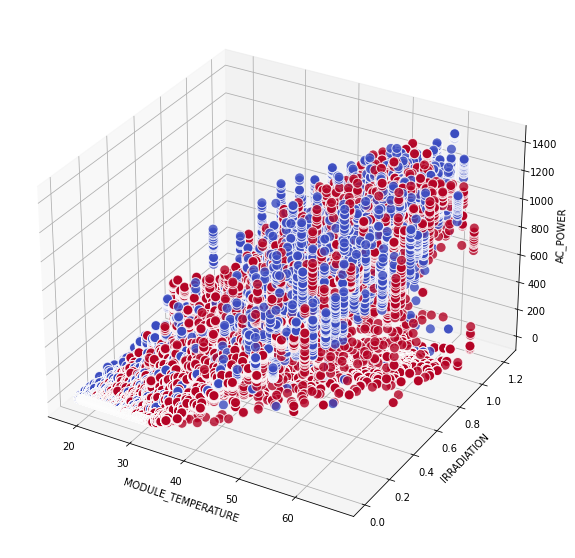

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')

xs = df['MODULE_TEMPERATURE']
ys = df['IRRADIATION']
zs = df['AC_POWER']

ax.scatter(xs, ys, zs,  c = df['PLANT_ID'] ,cmap = 'coolwarm', s=100, alpha=0.8, edgecolors='w')

ax.set_xlabel('MODULE_TEMPERATURE')
ax.set_ylabel('IRRADIATION')
ax.set_zlabel('AC_POWER')

In [31]:
df['TIME'] = df['DATE_TIME'].dt.time
df['DATE'] = df['DATE_TIME'].dt.date
df.head()

DATE_TIME PLANT_ID     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15   Plant1  1BY6WEcLGh8j5v7       0.0       0.0     0.000000   
1 2020-05-15   Plant2  Et9kgGMDl729KT4       0.0       0.0   269.933333   
2 2020-05-15   Plant2  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   
3 2020-05-15   Plant2  LYwnQax7tkwH5Cb       0.0       0.0  1872.500000   
4 2020-05-15   Plant2  LlT2YUhhzqhg5Sw       0.0       0.0  1094.357143   

    TOTAL_YIELD     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0  6.259559e+06  HmiyD2TTLFNqkNe            25.184316           22.857507   
1  1.704250e+06  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
2  1.994153e+07  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
3  1.794959e+09  iq8k7ZNt4Mwm3w0            27.004764           25.060789   
4  2.825928e+08  iq8k7ZNt4Mwm3w0            27.004764           25.060789   

   IRRADIATION  PLANT_EFFICIENCY        YIELD      TIME        DATE  
0          0.0               0.0     0.000000  00:00:00  2020-05-15  
1          0.0               0.0  2907.066667  00:00:00  2020-05-15  
2          0.0               0.0  1304.500000  00:00:00  2020-05-15  
3          0.0               0.0   778.142857  00:00:00  2020-05-15  
4          0.0               0.0  4597.842857  00:00:00  2020-05-15

In [33]:
#define function to multi plot
def multi_plot(data= None, row = None, col = None, title='AC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,20)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.8)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, style = 'k.')
        ax.set_title('{} {}'.format(title, cols[i-1]))

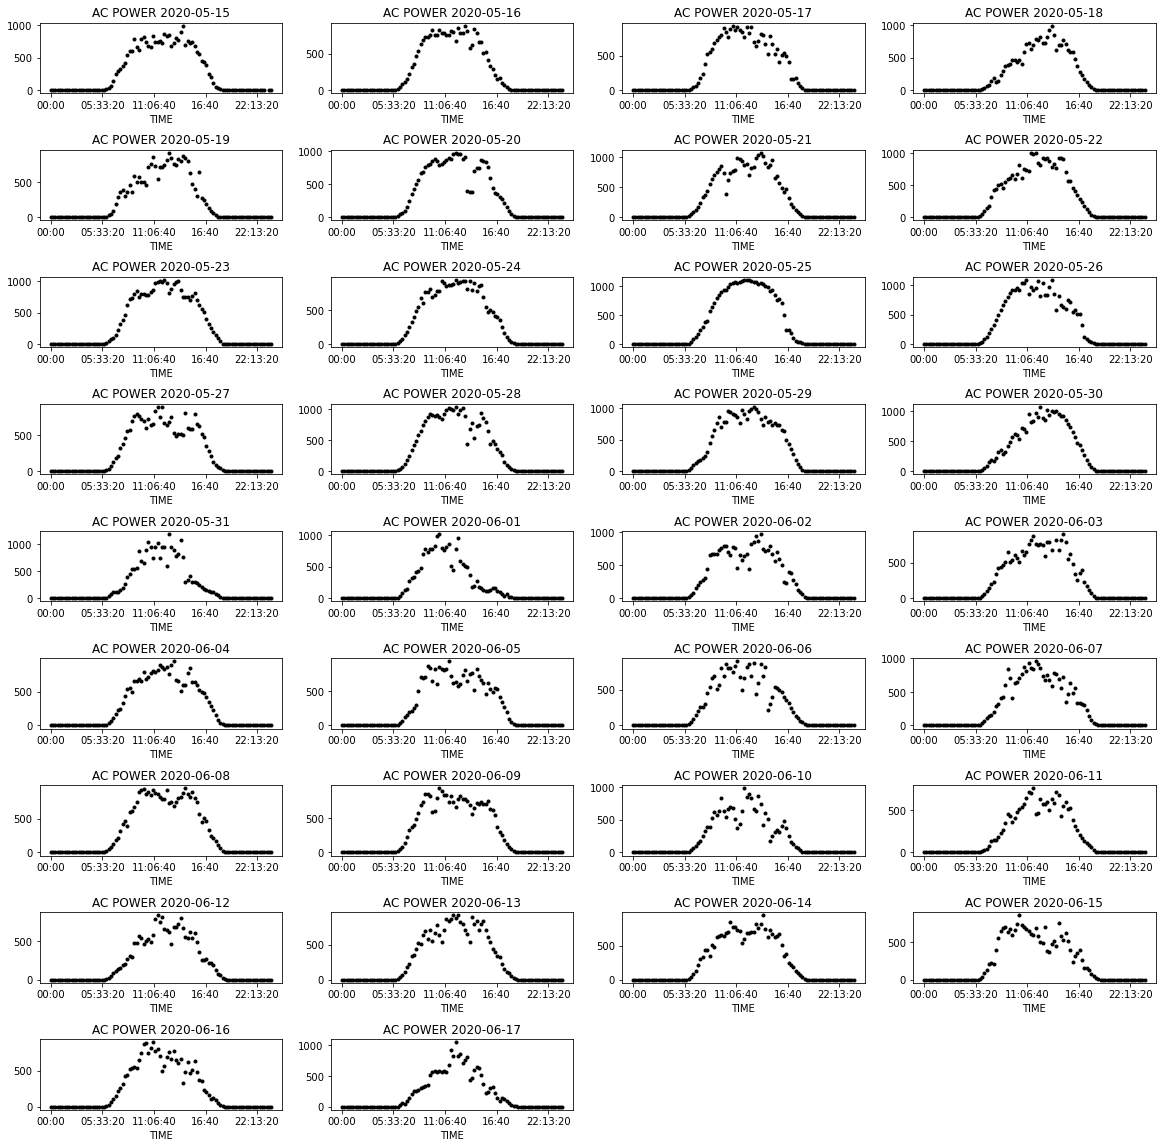

In [34]:
AC_power = df.pivot_table(values='AC_POWER', index='TIME', columns='DATE')
multi_plot(data=AC_power , row=9, col=4, title='AC POWER')

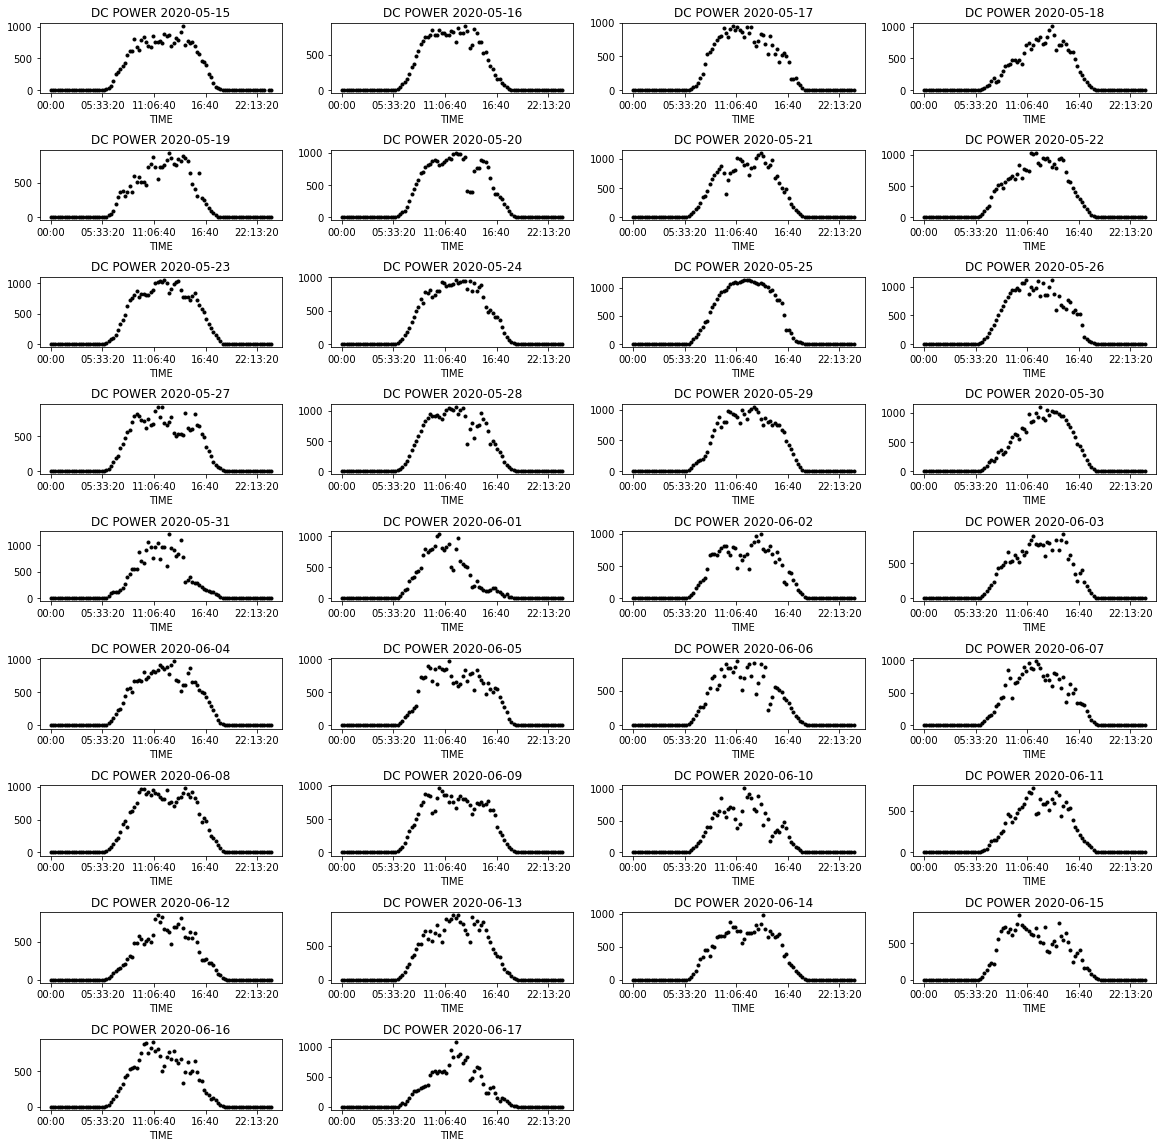

In [35]:
DC_power = df.pivot_table(values='DC_POWER', index='TIME', columns='DATE')
multi_plot(data=DC_power , row=9, col=4, title='DC POWER')

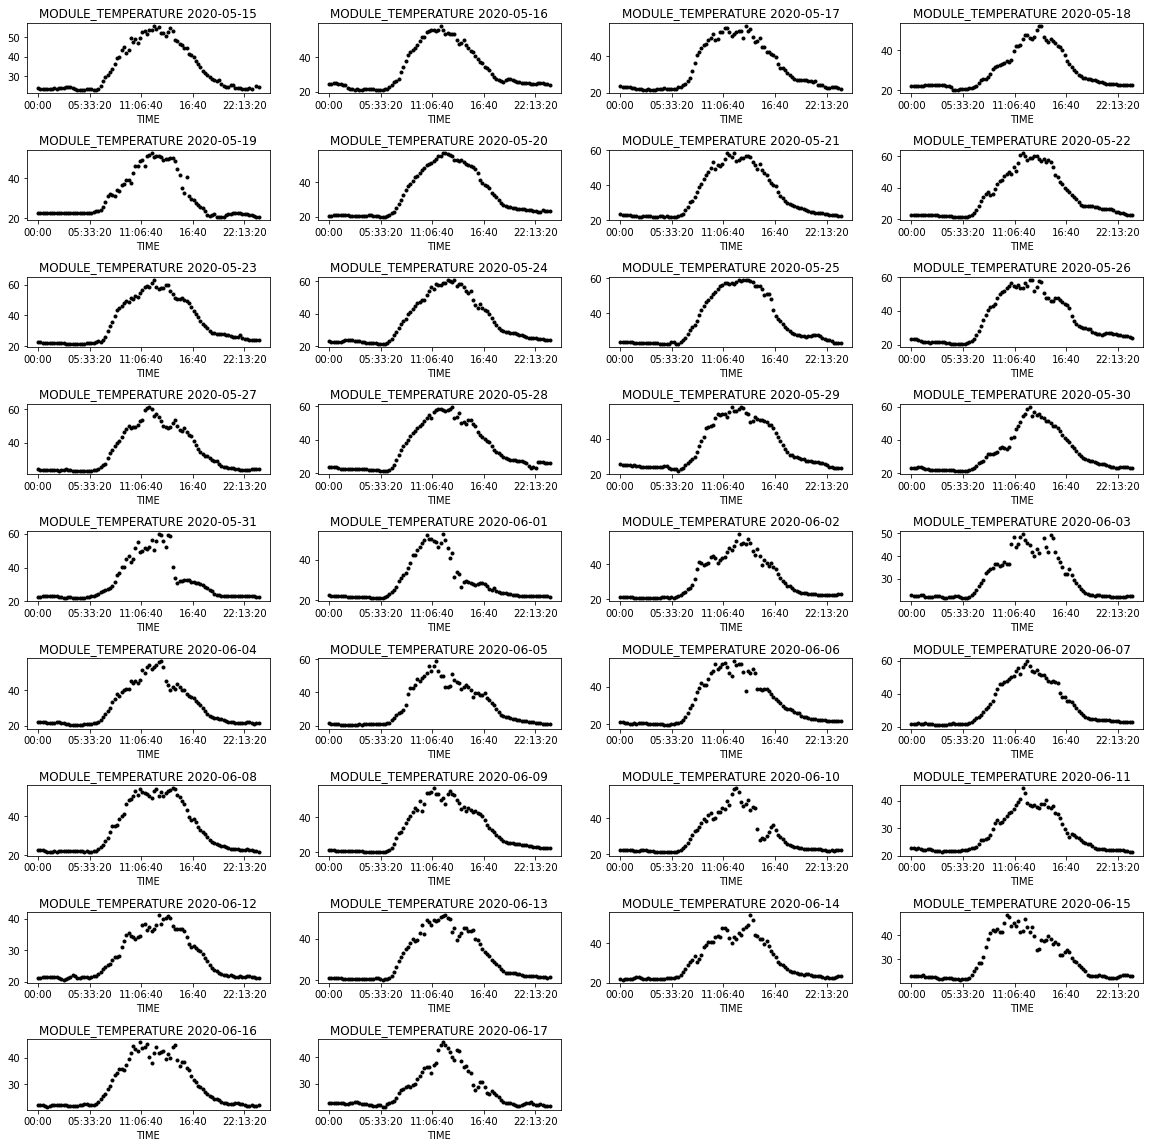

In [36]:
MT_power = df.pivot_table(values='MODULE_TEMPERATURE', index='TIME', columns='DATE')
multi_plot(data=MT_power , row=9, col=4, title='MODULE_TEMPERATURE')

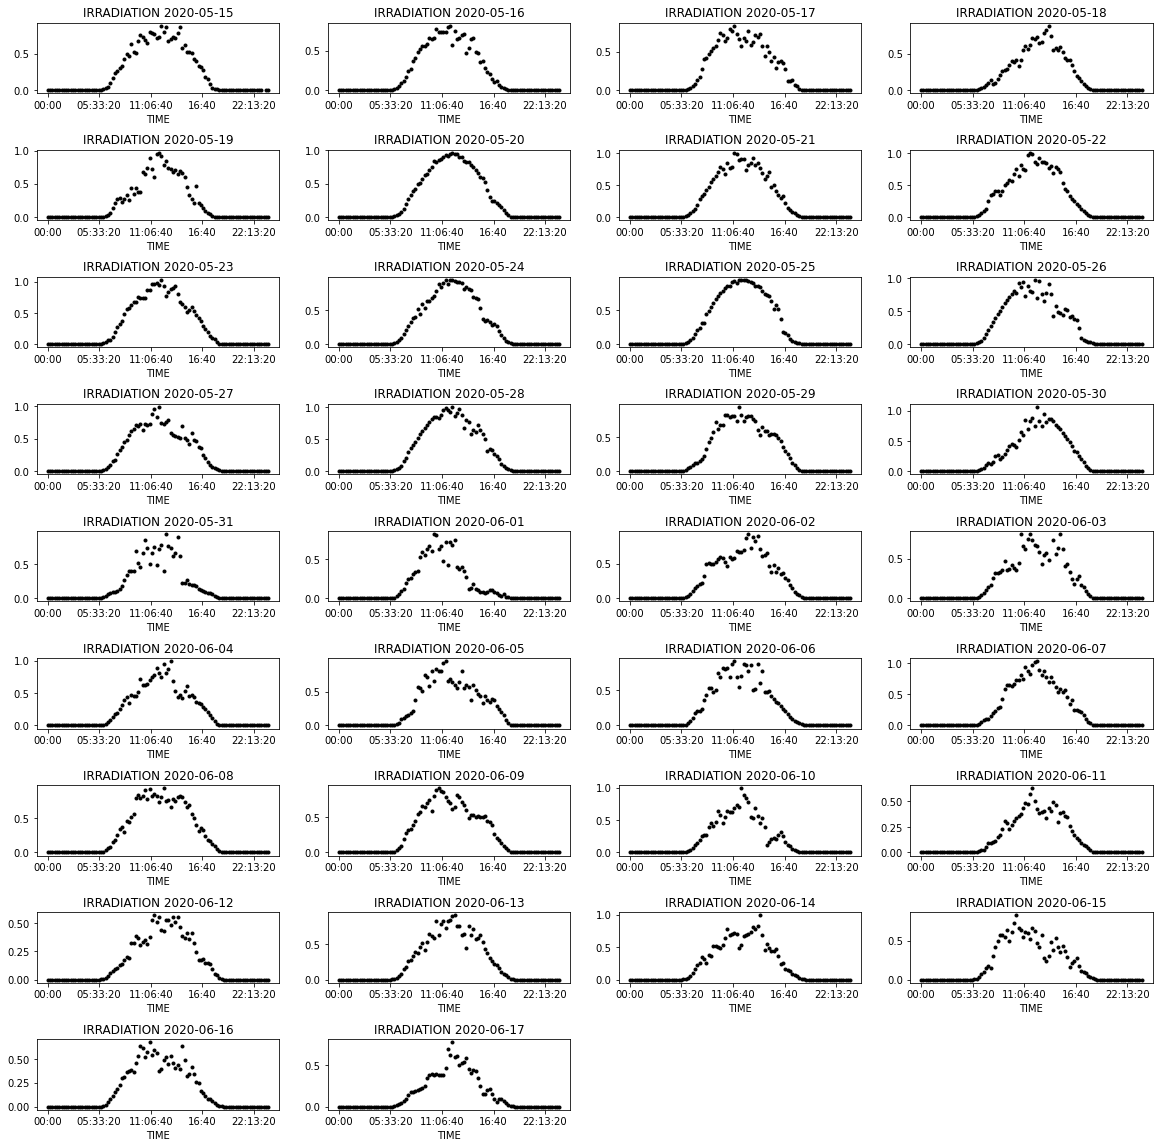

In [37]:
IRR_power = df.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')
multi_plot(data=IRR_power , row=9, col=4, title='IRRADIATION')

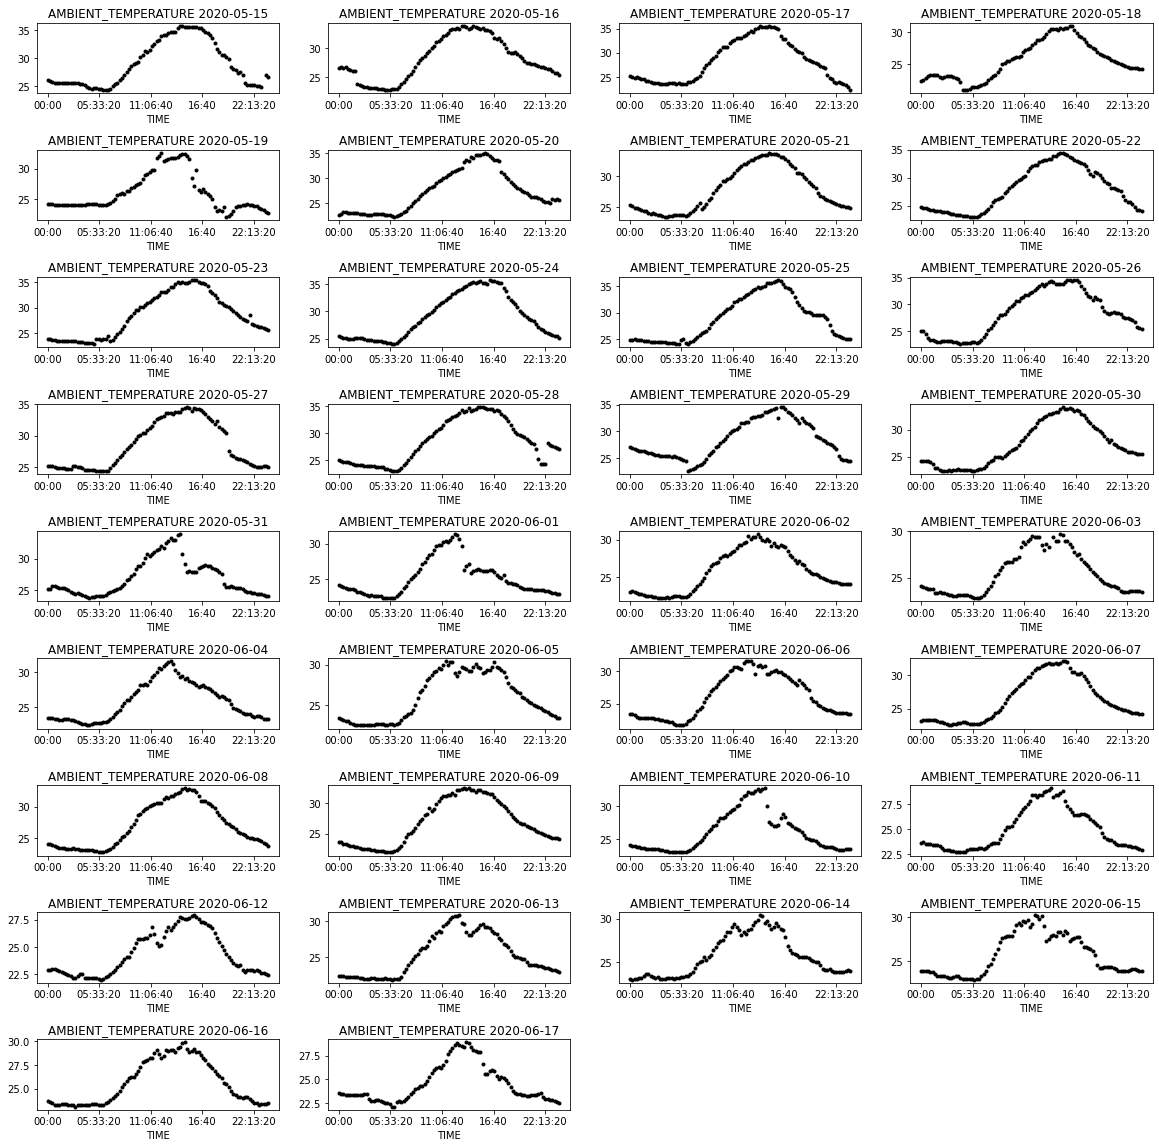

In [38]:
AT_power = df.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')
multi_plot(data=AT_power , row=9, col=4, title='AMBIENT_TEMPERATURE')

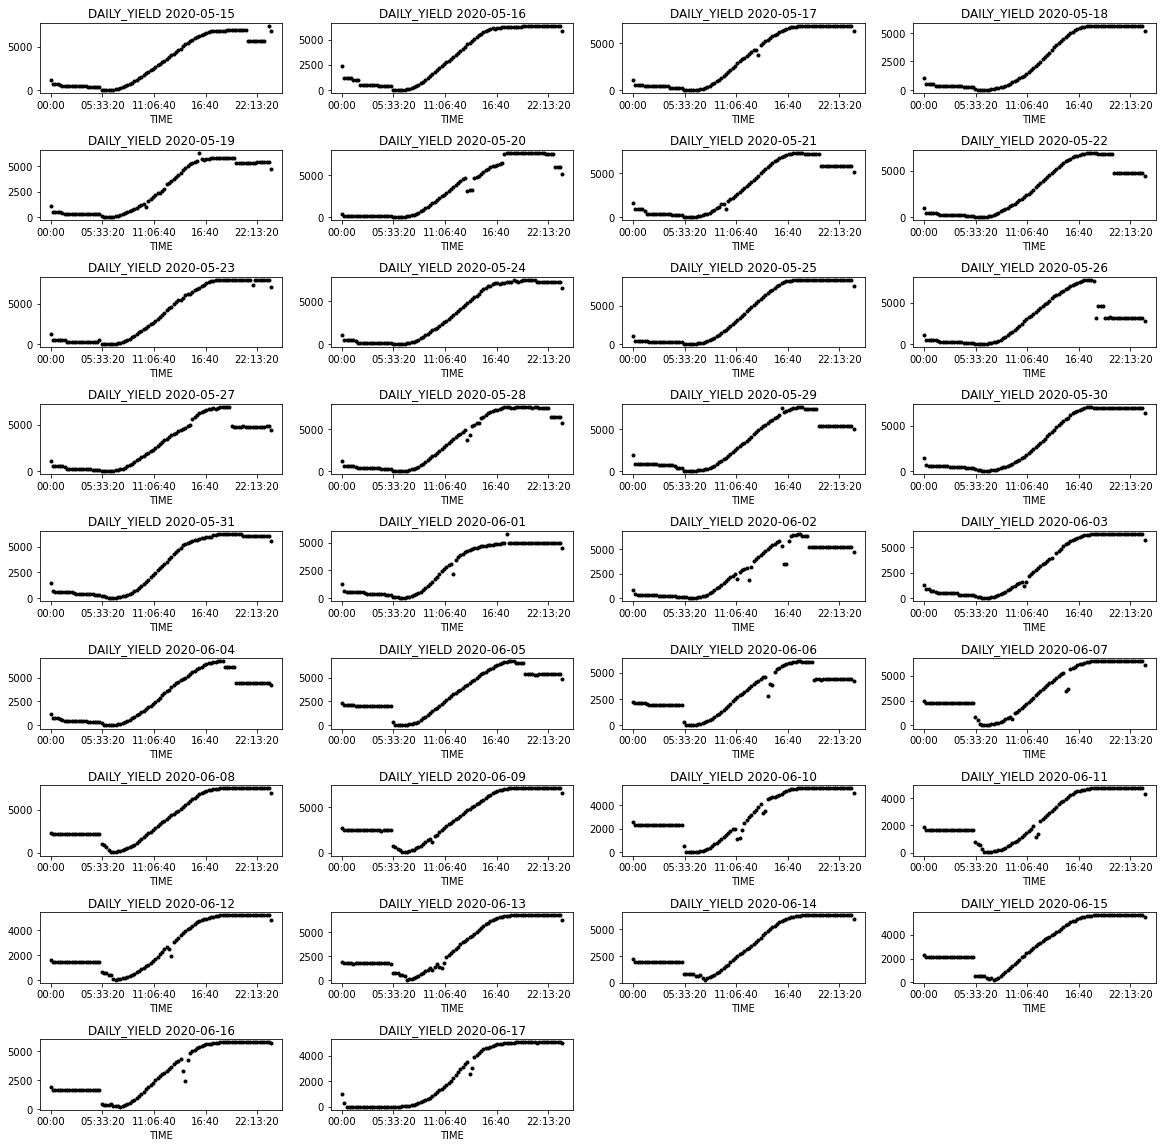

In [39]:
DAILY_YIELD = df.pivot_table(values='DAILY_YIELD', index='TIME', columns='DATE')
multi_plot(data=DAILY_YIELD , row=9, col=4, title='DAILY_YIELD')
plt.savefig('Dail Yield')
plt.show()

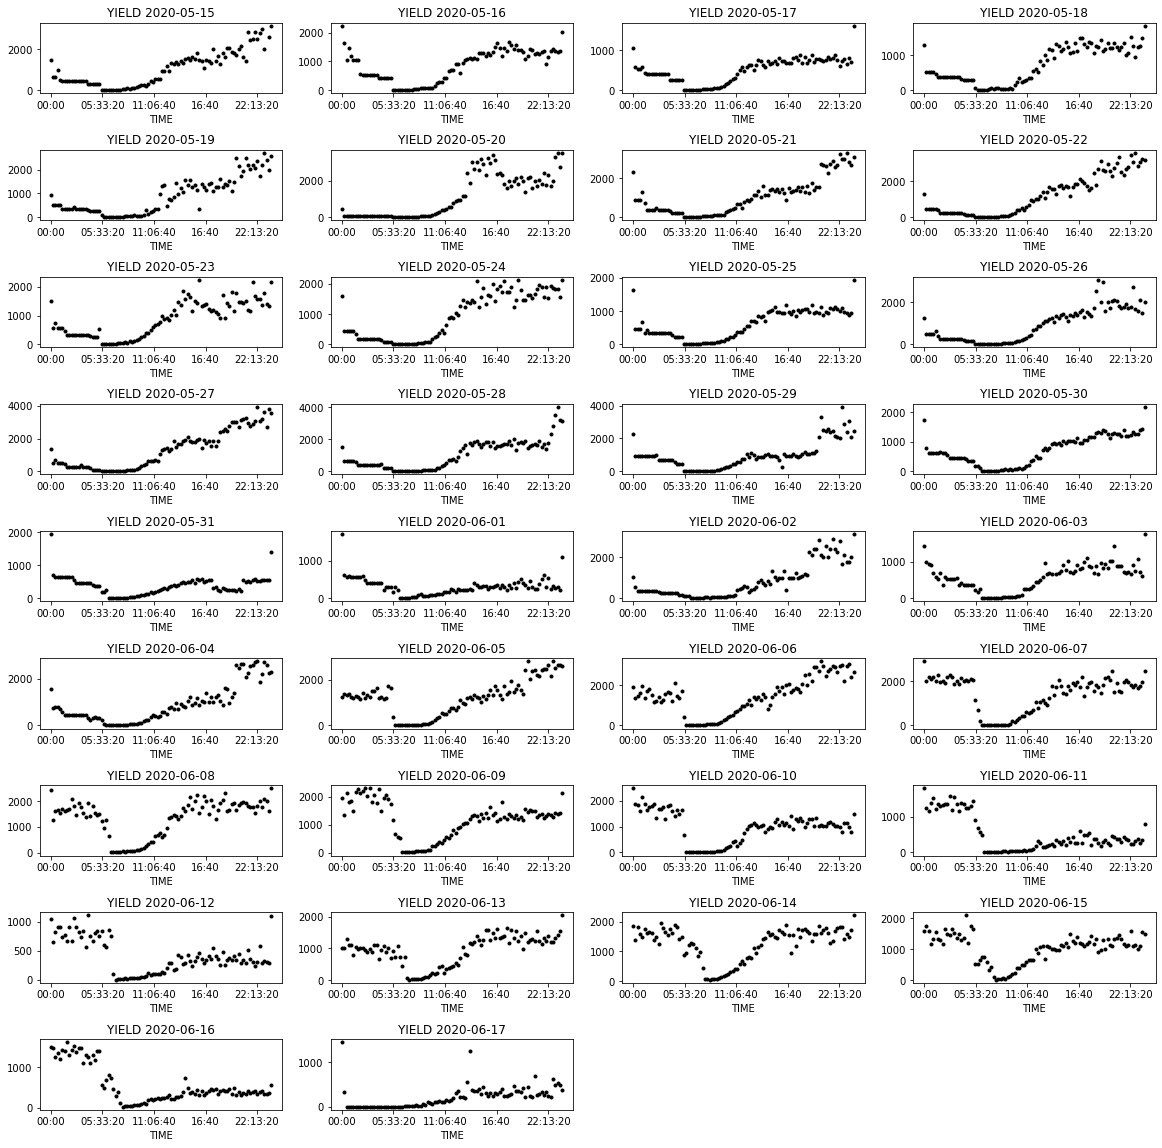

In [40]:
YIELD = df.pivot_table(values='YIELD', index='TIME', columns='DATE')
multi_plot(data=YIELD , row=9, col=4, title='YIELD')
plt.savefig('Yield')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

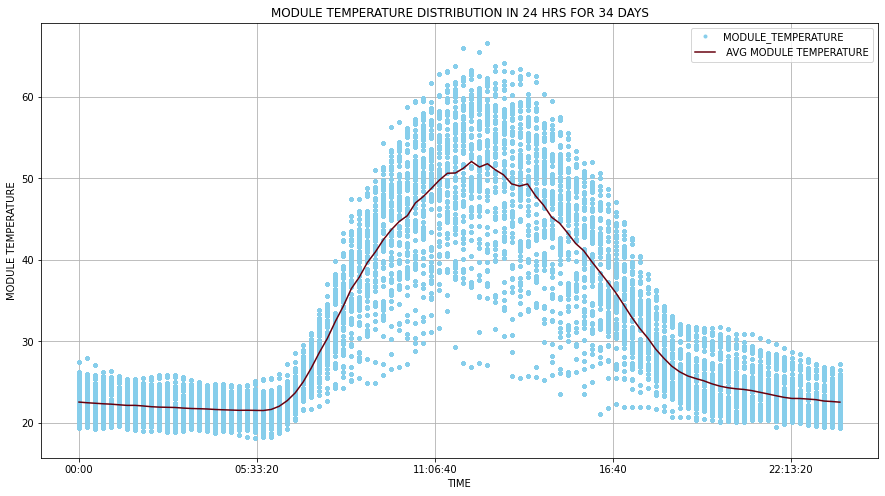

In [41]:
df.plot(x= 'TIME', y='MODULE_TEMPERATURE', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['MODULE_TEMPERATURE'].mean().plot(cmap = 'Reds_r', legend = True, label = ' AVG MODULE TEMPERATURE')
plt.ylabel('MODULE TEMPERATURE')
plt.title('MODULE TEMPERATURE DISTRIBUTION IN 24 HRS FOR 34 DAYS')
plt.grid()
plt.savefig('modeule temp')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

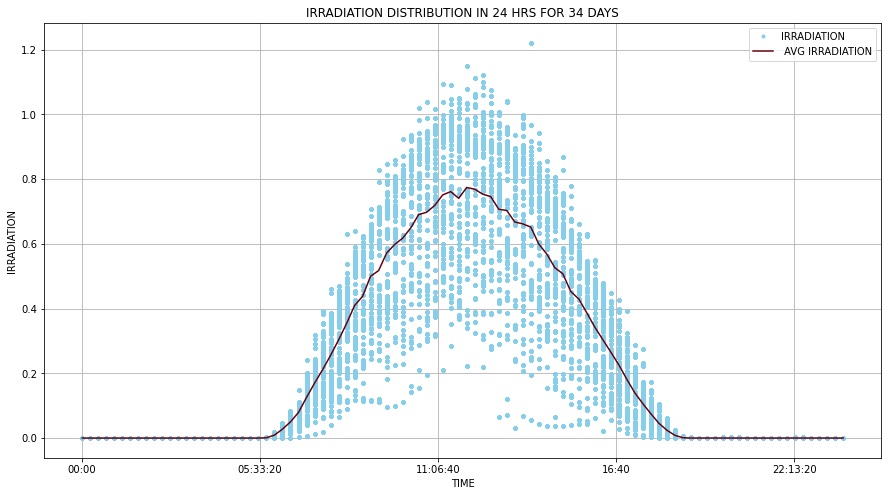

In [42]:
df.plot(x= 'TIME', y='IRRADIATION', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['IRRADIATION'].mean().plot(cmap = 'Reds_r', legend = True, label = ' AVG IRRADIATION')
plt.ylabel('IRRADIATION')
plt.title('IRRADIATION DISTRIBUTION IN 24 HRS FOR 34 DAYS')
plt.grid()
plt.savefig('IRRADIATION')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

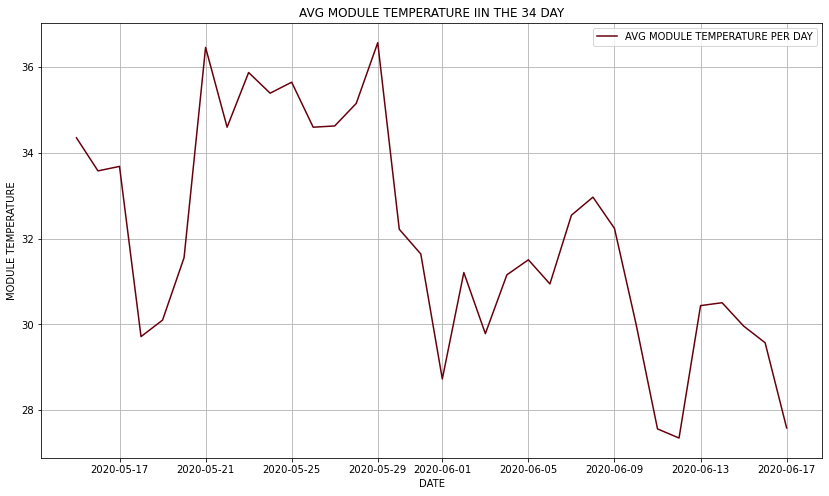

In [43]:
df.groupby('DATE')['MODULE_TEMPERATURE'].mean().plot(cmap = 'Reds_r', figsize = (14,8),legend= True, label = 'AVG MODULE TEMPERATURE PER DAY')
plt.ylabel('MODULE TEMPERATURE')
plt.xlabel('DATE')
plt.title('AVG MODULE TEMPERATURE IIN THE 34 DAY')
plt.grid()
plt.savefig('MODULE_TEMPERATURE')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

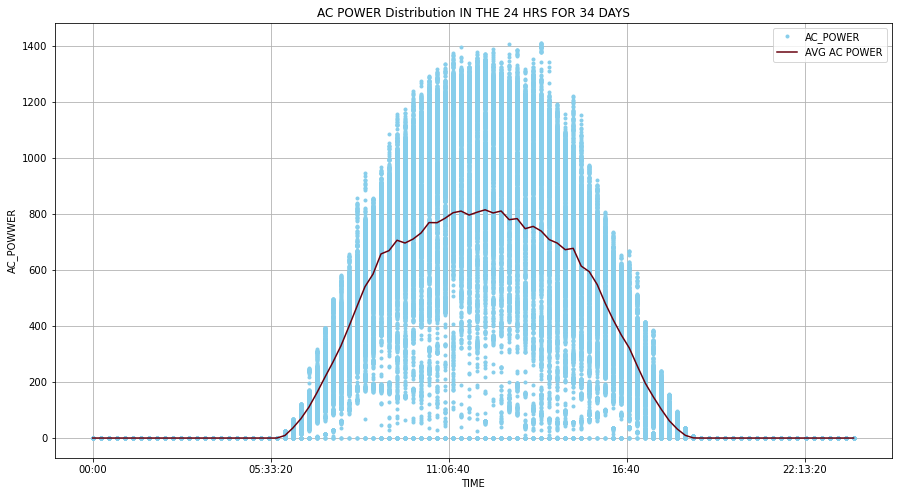

In [44]:
df.plot(x= 'TIME', y='AC_POWER', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['AC_POWER'].mean().plot(cmap = 'Reds_r', legend = True, label = 'AVG AC POWER')
plt.ylabel('AC_POWWER')
plt.title('AC POWER Distribution IN THE 24 HRS FOR 34 DAYS')
plt.grid()
plt.savefig('AC Power')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

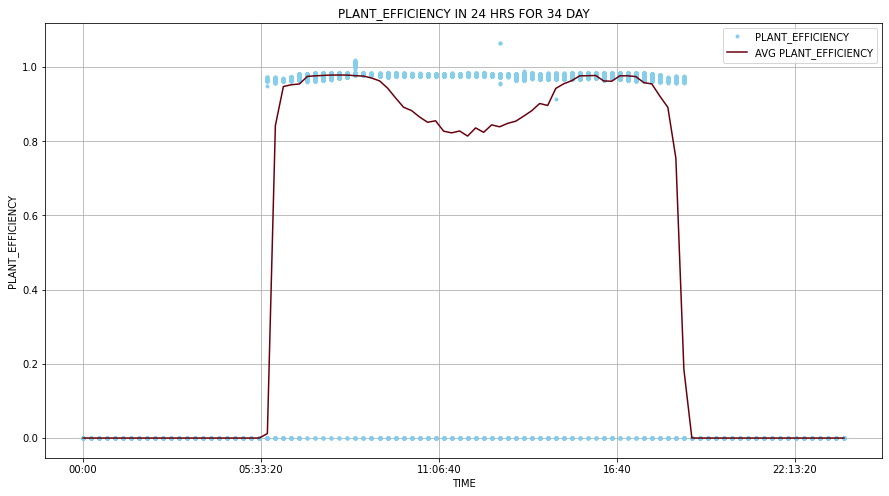

In [45]:
df.plot(x= 'TIME', y='PLANT_EFFICIENCY', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['PLANT_EFFICIENCY'].mean().plot(cmap = 'Reds_r', legend = True, label = 'AVG PLANT_EFFICIENCY')
plt.ylabel('PLANT_EFFICIENCY')
plt.title('PLANT_EFFICIENCY IN 24 HRS FOR 34 DAY')
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

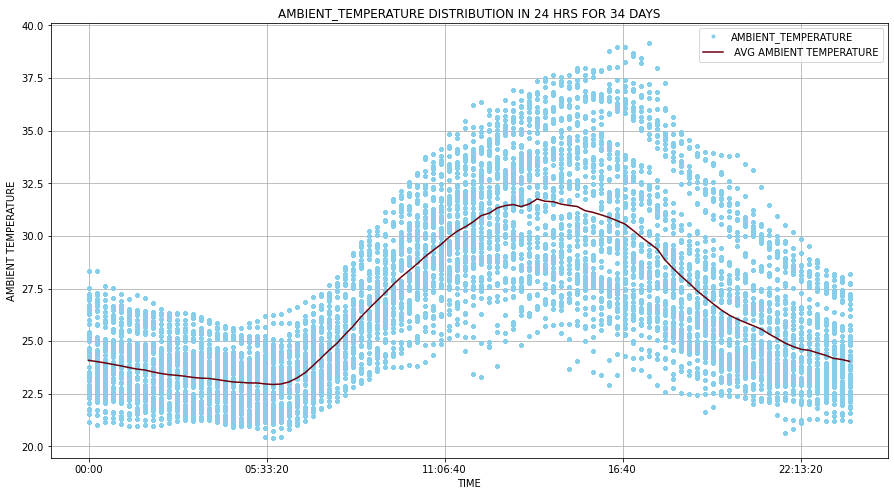

In [46]:
df.plot(x= 'TIME', y='AMBIENT_TEMPERATURE', color = 'skyblue', style='.', figsize = (15, 8))
df.groupby('TIME')['AMBIENT_TEMPERATURE'].mean().plot(cmap = 'Reds_r', legend = True, label = ' AVG AMBIENT TEMPERATURE')
plt.ylabel('AMBIENT TEMPERATURE')
plt.title('AMBIENT_TEMPERATURE DISTRIBUTION IN 24 HRS FOR 34 DAYS')
plt.grid()
plt.savefig('Ambient Temperature')
plt.show

In [47]:
df.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'SOURCE_KEY_y', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION', 'PLANT_EFFICIENCY', 'YIELD',
       'TIME', 'DATE'],
      dtype='object')

### Machine Learning

In [32]:
X = df.drop(df[['DATE_TIME', 'DATE', 'DC_POWER',  'AC_POWER','TIME','PLANT_ID', 'SOURCE_KEY_x',
                'SOURCE_KEY_y', 'DAILY_YIELD','TOTAL_YIELD']], axis =1)
y = df.AC_POWER

In [197]:
display(X)

AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
0                 25.184316           22.857507          0.0   
1                 27.004764           25.060789          0.0   
2                 27.004764           25.060789          0.0   
3                 27.004764           25.060789          0.0   
4                 27.004764           25.060789          0.0   
...                     ...                 ...          ...   
136467            21.909288           20.427972          0.0   
136468            21.909288           20.427972          0.0   
136469            21.909288           20.427972          0.0   
136470            21.909288           20.427972          0.0   
136471            23.202871           22.535908          0.0   

        PLANT_EFFICIENCY        YIELD  
0                    0.0     0.000000  
1                    0.0  2907.066667  
2                    0.0  1304.500000  
3                    0.0   778.142857  
4                    0.0  4597.842857  
...                  ...          ...  
136467               0.0    18.000000  
136468               0.0   513.000000  
136469               0.0   350.000000  
136470               0.0  1555.000000  
136471               0.0     0.000000  

[136472 rows x 5 columns]

### Analyzing The Extreme Values

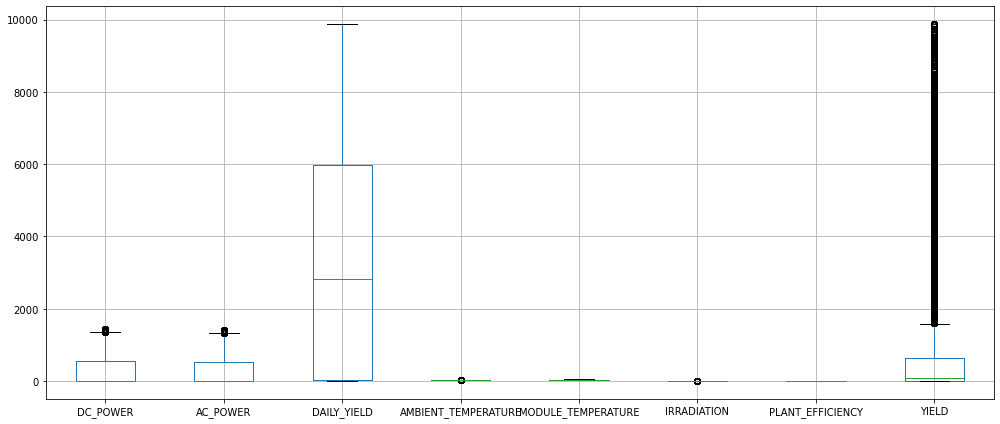

In [48]:
plt.figure(figsize =(14,6))
df.drop('TOTAL_YIELD', axis= 1).boxplot(figsize = (8,4), grid = True)
plt.tight_layout()

#### Extreme_Values_AMBIENT_TEMPERATURE

<AxesSubplot:>

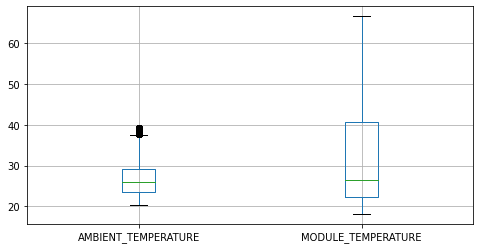

In [53]:
df[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']].boxplot(figsize = (8,4), grid = True)

In [54]:
#Extreme_Values_AMBIENT_TEMPERATURE

Q1_AT = df['AMBIENT_TEMPERATURE'].quantile(0.25)
Q3_AT = df['AMBIENT_TEMPERATURE'].quantile(0.75)
IQR_AT = Q3_AT - Q1_AT    #IQR is interquartile range 

filtered_AMBIENT_TEMPERATURE = (df['AMBIENT_TEMPERATURE'] >= Q1_AT - 1.5 * IQR_AT) & (df['AMBIENT_TEMPERATURE'] <= Q3_AT + 1.5 *IQR_AT)
Extreme_Values_AMBIENT_TEMPERATURE = X.loc[~filtered_AMBIENT_TEMPERATURE]['AMBIENT_TEMPERATURE']

Extreme_Values_AMBIENT_TEMPERATURE

32890    37.993901
32891    37.993901
32892    37.993901
32893    37.993901
32894    37.993901
           ...    
40691    38.036724
40692    38.036724
40693    38.036724
40694    38.036724
40695    38.036724
Name: AMBIENT_TEMPERATURE, Length: 378, dtype: float64

#### Extreme_Values_IRRADIATION

<AxesSubplot:>

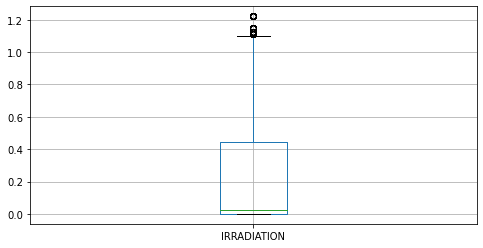

In [55]:
df[['IRRADIATION']].boxplot(figsize = (8,4), grid = True)

In [56]:
#Extreme_IRRADIATION
Q1_IR = df['IRRADIATION'].quantile(0.25)
Q3_IR = df['IRRADIATION'].quantile(0.75)
IQR_IR = Q3_IR - Q1_IR    #IQR is interquartile range 

Filtered_IRRADIATION = (df['IRRADIATION'] >= Q1_IR - 1.5 * IQR_IR) & (df['IRRADIATION'] <= Q3_IR + 1.5 *IQR_IR)
Extreme_IRRADIATION = X.loc[~Filtered_IRRADIATION]['IRRADIATION']

Extreme_IRRADIATION

32428     1.112297
32429     1.112297
32430     1.112297
32431     1.112297
32432     1.112297
            ...   
122102    1.221652
122103    1.221652
122104    1.221652
122106    1.221652
122118    1.221652
Name: IRRADIATION, Length: 88, dtype: float64

<AxesSubplot:>

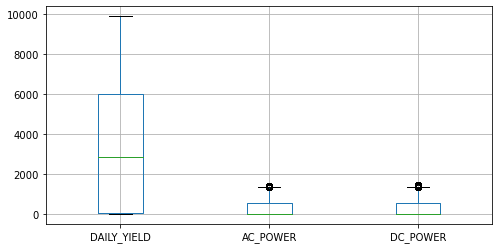

In [57]:
df[['DAILY_YIELD', 'AC_POWER', 'DC_POWER']].boxplot(figsize = (8,4), grid = True)

In [59]:
#Extreme_Values_AC_POWER

Q1_AC = df['AC_POWER'].quantile(0.25)
Q3_AC = df['AC_POWER'].quantile(0.75)
IQR_AC = Q3_AC - Q1_AC    #IQR is interquartile range 

Filtered_AC_POWER = (df['AC_POWER'] >= Q1_AC - 1.5 * IQR_AC) & (df['AC_POWER'] <= Q3_AC + 1.5 *IQR_AC)
Extreme_Values_AC_POWER = df.loc[~Filtered_AC_POWER]['AC_POWER']

print(Extreme_Values_AC_POWER)

24869     1356.600000
24870     1334.387500
24873     1338.012500
24885     1368.700000
28681     1358.875000
             ...     
134418    1345.885714
134420    1341.114286
134421    1345.771429
134423    1339.800000
134429    1345.242857
Name: AC_POWER, Length: 126, dtype: float64


In [64]:
#Extreme_Values_DAILY_YIELD
Q1_AC = df['YIELD'].quantile(0.25)
Q3_AC = df['YIELD'].quantile(0.75)
IQR_AC = Q3_AC - Q1_AC    #IQR is interquartile range 

Filtered_YIELD = (df['YIELD'] >= Q1_AC - 1.5 * IQR_AC) & (df['YIELD'] <= Q3_AC + 1.5 *IQR_AC)
Extreme_Values_YIELD = df.loc[~Filtered_YIELD]['YIELD']

print(Extreme_Values_YIELD)

1         2907.066667
4         4597.842857
5         3826.000000
7         4843.800000
8         5495.000000
             ...     
136415    1613.000000
136425    1940.000000
136427    2019.000000
136448    1599.000000
136449    1601.000000
Name: YIELD, Length: 23960, dtype: float64


<AxesSubplot:>

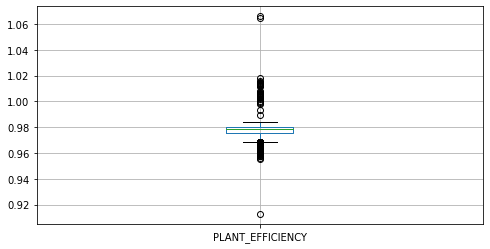

In [61]:
df[['PLANT_EFFICIENCY']].boxplot(figsize = (8,4), grid = True)

In [61]:
#Extreme_Values_PLANT_EFFIENCY
Q1_AC = df['PLANT_EFFICIENCY'].quantile(0.25)
Q3_AC = df['PLANT_EFFICIENCY'].quantile(0.75)
IQR_AC = Q3_AC - Q1_AC    #IQR is interquartile range 

Filtered_PLANT_EFFICIENCY = (df['PLANT_EFFICIENCY'] >= Q1_AC - 1.5 * IQR_AC) & (df['PLANT_EFFICIENCY'] <= Q3_AC + 1.5 *IQR_AC)
Extreme_Values_PLANT_EFFICIENCY = df.loc[~Filtered_PLANT_EFFICIENCY]['PLANT_EFFICIENCY']

print(Extreme_Values_AC_POWER)

24869     1356.600000
24870     1334.387500
24873     1338.012500
24885     1368.700000
28681     1358.875000
             ...     
134418    1345.885714
134420    1341.114286
134421    1345.771429
134423    1339.800000
134429    1345.242857
Name: AC_POWER, Length: 126, dtype: float64


In [29]:
df['PLANT_EFFICIENCY'].clip(upper=1.0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
136467    0.0
136468    0.0
136469    0.0
136470    0.0
136471    0.0
Name: PLANT_EFFICIENCY, Length: 136472, dtype: float64

#### Defining my Target & Features

In [63]:
X.shape, df.shape

((136472, 5), (136472, 15))

#### Standaradization Vs. Normalization

In [33]:
#NORMALIZATION
from sklearn.preprocessing import MinMaxScaler

In [34]:
df_Norm = X.copy()

In [35]:
Min_Max_scaler = MinMaxScaler()

In [36]:
Min_Max_scaled_X_train = Min_Max_scaler.fit_transform(df_Norm)

<AxesSubplot:>

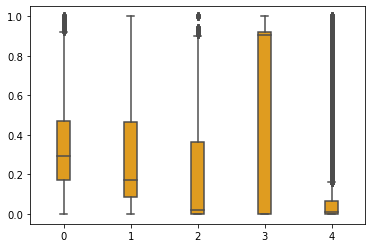

In [37]:
sns.boxplot(data = Min_Max_scaled_X_train, width = 0.2, color = 'orange')

<AxesSubplot:ylabel='Count'>

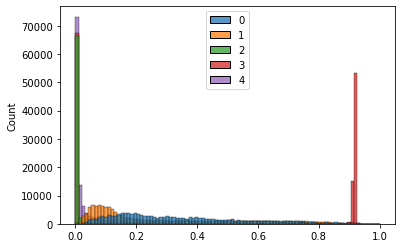

In [38]:
sns.histplot(data = Min_Max_scaled_X_train)

In [39]:
np.std(Min_Max_scaled_X_train)

0.31205224964073774

In [40]:
np.mean(Min_Max_scaled_X_train)

0.2726768843737157

#### Standardization

In [41]:
X.columns

Index(['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'PLANT_EFFICIENCY', 'YIELD'],
      dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
df_SS = X.copy()

In [45]:
scaled = scaler.fit_transform(df_SS)

<AxesSubplot:>

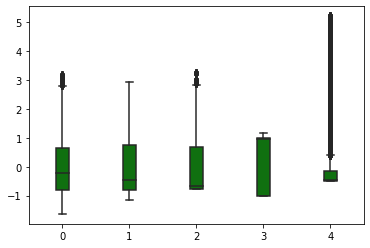

In [46]:
sns.boxplot(data = scaled, width = 0.2, color = 'green')

<AxesSubplot:ylabel='Count'>

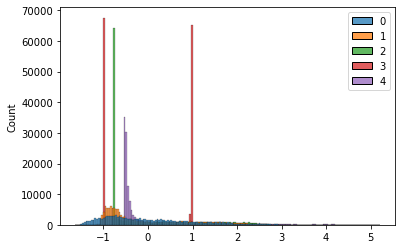

In [47]:
sns.histplot(data = scaled)

In [48]:
np.mean(scaled)

6.797618528404265e-17

In [49]:
np.std(scaled)

1.0

In [50]:
X.columns

Index(['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'PLANT_EFFICIENCY', 'YIELD'],
      dtype='object')

<AxesSubplot:>

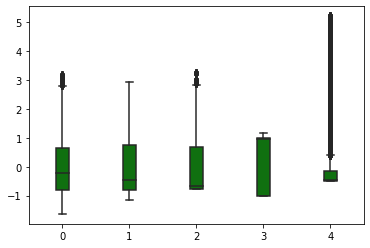

In [51]:
df_SS_clean = X.copy()
scaled_clean = scaler.fit_transform(df_SS_clean)
sns.boxplot(data = scaled_clean, width = 0.2, color = 'green')

<AxesSubplot:ylabel='Count'>

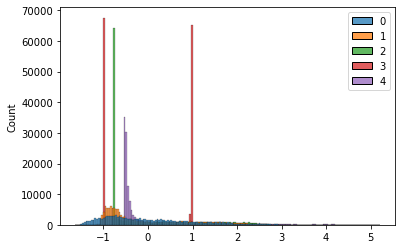

In [52]:
sns.histplot(data = scaled_clean)

In [53]:
# I have more condidence to choose Standarization with filtered dataset mean =0 & std = 1

### Train, Test, and Split, and applying Standarization 

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

#### Aplying STD on train set and test seperately 

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()

In [58]:
y_train = np.array(y_train).reshape(-1,1)

In [59]:
scaled_X_train = scaler.fit_transform(X_train)

In [60]:
scaled_y_train = scaler.fit_transform(y_train)

## KNN 

### n = 5

In [61]:
from sklearn.neighbors import KNeighborsRegressor

In [62]:
knn_5 = KNeighborsRegressor(n_neighbors= 5)

In [63]:
knn_5.fit(scaled_X_train, scaled_y_train)

KNeighborsRegressor()

In [64]:
pred_5 = knn_5.predict(scaled_X_train)

In [146]:
print('%.5f' % knn_5.score(scaled_X_train, scaled_y_train))

1.00000


In [66]:
scaled_X_test = scaler.fit_transform(X_test)

In [67]:
scaled_y_test = scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [68]:
pred_5 = knn_5.predict(scaled_X_test)

In [75]:
print('%.5f' % knn_5.score(scaled_X_test, scaled_y_test))

0.97645


In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [71]:
print('MAE:  %.5f' % mean_absolute_error(scaled_y_test, pred_5))
print('MSE:  %.5f' % mean_squared_error(scaled_y_test, pred_5))
print('RMSE: %.5f' % np.sqrt(mean_squared_error(scaled_y_test, pred_5)))

MAE:  0.05393
MSE:  0.02355
RMSE: 0.15346


### n = 11

In [76]:
knn_11 = KNeighborsRegressor(n_neighbors= 11)
knn_11.fit(scaled_X_train, scaled_y_train)
pred_11_trained = knn_11.predict(scaled_X_train)
print('%.5f' % knn_11.score(scaled_X_train, scaled_y_train))

0.98007


In [77]:
pred_11 = knn_11.predict(scaled_X_test)
print('%.5f' % knn_11.score(scaled_X_test, scaled_y_test))

0.97655


In [78]:
print('MAE:  %.5f' % mean_absolute_error(scaled_y_test, pred_11))
print('MSE:  %.5f' % mean_squared_error(scaled_y_test, pred_11))
print('RMSE:  %.5f' % np.sqrt(mean_squared_error(scaled_y_test, pred_11)))

MAE:  0.05461
MSE:  0.02345
RMSE:  0.15315


### n =15

In [79]:
knn_15 = KNeighborsRegressor(n_neighbors= 15)
knn_15.fit(scaled_X_train, scaled_y_train)
pred_15_trained = knn_15.predict(scaled_X_train)
print('%.5f' % knn_15.score(scaled_X_train, scaled_y_train))

0.97839


In [80]:
pred_15 = knn_15.predict(scaled_X_test)
print('%.5f' % knn_15.score(scaled_X_test, scaled_y_test))

0.97550


In [81]:
print('MAE:  %.5f' % mean_absolute_error(scaled_y_test, pred_15))
print('MAE:  %.5f' % mean_squared_error(scaled_y_test, pred_15))
print('MAE:  %.5f' % np.sqrt(mean_squared_error(scaled_y_test, pred_15)))

MAE:  0.05647
MAE:  0.02450
MAE:  0.15654


### weight = 'distance' & n= 5

In [82]:
knn_5 = KNeighborsRegressor(n_neighbors= 5, weights= 'distance')
knn_5.fit(scaled_X_train, scaled_y_train)
pred_5_trained = knn_5.predict(scaled_X_train)
print('%.5f' % knn_5.score(scaled_X_train, scaled_y_train))

1.00000


In [83]:
pred_5 = knn_5.predict(scaled_X_test)
print('%.5f' % knn_5.score(scaled_X_test, scaled_y_test))

0.97657


In [85]:
print('MAE:  %.5f'% mean_absolute_error(scaled_y_test, pred_5))
print('MSE:  %.5f'% mean_squared_error(scaled_y_test, pred_5))
print('RMSE:  %.5f'% np.sqrt(mean_squared_error(scaled_y_test, pred_5)))

MAE:  0.05314
MSE:  0.02343
RMSE:  0.15307


#### Applying Grid Search Technique to evaluate multiple hyperparameters  

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
from sklearn.metrics import accuracy_score, r2_score

In [88]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [89]:
knn_pid_search = GridSearchCV(estimator=KNeighborsRegressor(), cv=10, 
                              param_grid=dict(n_neighbors=[5,11,15], 
                              p=[1, 2, 3, 4],  weights= ['uniform', 'distance']), scoring='accuracy')

In [90]:
knn_pid_search.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 11, 15], 'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [91]:
knn_pid_search.best_estimator_

KNeighborsRegressor(p=1)

In [92]:
knn_pid_search.param_grid

{'n_neighbors': [5, 11, 15],
 'p': [1, 2, 3, 4],
 'weights': ['uniform', 'distance']}

### KNN best_params_ Winners

In [95]:
knn_pid_search.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

In [93]:
knn_best = KNeighborsRegressor(n_neighbors= 5, weights= 'uniform', p=1)
knn_best.fit(scaled_X_train, scaled_y_train)
print('accuracy for training dataset: %.5f'% knn_best.score(scaled_X_train, scaled_y_train))
pred_knn_best = knn_best.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% knn_best.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.98493
accuracy for testing dataset: 0.97744


In [94]:
print('MAE_knn_best:   %.5f'% mean_absolute_error(scaled_y_test, pred_knn_best))
print('MSE_knn_best:   %.5f'% mean_squared_error(scaled_y_test, pred_knn_best))
print('RMSE_knn_best:  %.5f'% np.sqrt(mean_squared_error(scaled_y_test, pred_knn_best)))
print('r2_score_knn_best:   %.5f'% r2_score(scaled_y_test, pred_knn_best))

MAE_knn_best:   0.05272
MSE_knn_best:   0.02256
RMSE_knn_best:  0.15020
r2_score_knn_best:   0.97744


### KNN Learning Curve

In [95]:
from sklearn.model_selection import learning_curve

In [96]:
data_sizes, training_scores, validation_scores = learning_curve(KNeighborsRegressor(n_neighbors= 5, p= 1, weights='uniform'), 
X = scaled_X_train, y =scaled_y_train, cv=10,error_score=0, scoring='neg_mean_squared_error', train_sizes= np.array([0.1  , 0.325, 0.55 , 0.775, 1.]))

In [97]:
display(data_sizes)

array([ 8229, 26744, 45260, 63776, 82292])

In [98]:
training_scores

array([[-0.02403835, -0.02175397, -0.02175397, -0.02175397, -0.02175397,
        -0.02175397, -0.02175397, -0.02175397, -0.02175397, -0.02175397],
       [-0.01746737, -0.01672034, -0.01790244, -0.01700636, -0.01700636,
        -0.01700636, -0.01700636, -0.01700636, -0.01700636, -0.01700636],
       [-0.01662465, -0.01606384, -0.01714052, -0.0165831 , -0.01632543,
        -0.01633434, -0.01633434, -0.01633434, -0.01633434, -0.01633434],
       [-0.01539492, -0.01505894, -0.01576733, -0.01541428, -0.01535121,
        -0.01518061, -0.01530297, -0.01589134, -0.01589134, -0.01589134],
       [-0.01513907, -0.01498803, -0.01547118, -0.01527372, -0.01525155,
        -0.01512434, -0.01519122, -0.01548852, -0.01534644, -0.01487991]])

In [99]:
display(training_scores)
display(training_scores.shape)

array([[-0.02403835, -0.02175397, -0.02175397, -0.02175397, -0.02175397,
        -0.02175397, -0.02175397, -0.02175397, -0.02175397, -0.02175397],
       [-0.01746737, -0.01672034, -0.01790244, -0.01700636, -0.01700636,
        -0.01700636, -0.01700636, -0.01700636, -0.01700636, -0.01700636],
       [-0.01662465, -0.01606384, -0.01714052, -0.0165831 , -0.01632543,
        -0.01633434, -0.01633434, -0.01633434, -0.01633434, -0.01633434],
       [-0.01539492, -0.01505894, -0.01576733, -0.01541428, -0.01535121,
        -0.01518061, -0.01530297, -0.01589134, -0.01589134, -0.01589134],
       [-0.01513907, -0.01498803, -0.01547118, -0.01527372, -0.01525155,
        -0.01512434, -0.01519122, -0.01548852, -0.01534644, -0.01487991]])

(5, 10)

In [100]:
display(validation_scores)
display(validation_scores.shape)

array([[-0.03244293, -0.03554701, -0.02772489, -0.03334611, -0.03392804,
        -0.03916205, -0.03455965, -0.03416478, -0.03211516, -0.03507794],
       [-0.02533668, -0.03110596, -0.02527486, -0.02791879, -0.02887207,
        -0.03162103, -0.02826439, -0.02835415, -0.02624427, -0.02910479],
       [-0.02402552, -0.02921171, -0.02121112, -0.02537941, -0.02643763,
        -0.02784356, -0.02578681, -0.02497015, -0.02283872, -0.02691817],
       [-0.02353904, -0.02663616, -0.02057248, -0.02328833, -0.02403525,
        -0.02584592, -0.02506262, -0.02283578, -0.02146984, -0.02628447],
       [-0.0230775 , -0.02545449, -0.02015052, -0.02248621, -0.02359173,
        -0.02554305, -0.0245589 , -0.0223182 , -0.02086324, -0.02595501]])

(5, 10)

In [101]:
training_mean = - training_scores.mean(axis=1) 
training_standard_deviation = -training_scores.std(axis=1) 

In [102]:
validation_mean = - validation_scores.mean(axis=1) 
validation_standard_deviation = -validation_scores.std(axis=1)

In [103]:
import plotly.graph_objects as go

In [104]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean,
                        mode='lines',
                        name='Training',
                        line=dict(color='red')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean - training_standard_deviation,
                        mode='lines',
                        name='Training lower bound',
                        line=dict(width=0, color='red'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean + training_standard_deviation,
                        mode='lines',
                        name='Training upper bound',
                        line=dict(width=0, color='red'),
                        fill='tonexty',
                        fillcolor='rgba(255, 0, 0, 0.3)',
                        showlegend=False))

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean,
                        mode='lines',
                        name='Validation',
                        line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean - validation_standard_deviation,
                        mode='lines',
                        name='Validation lower bound',
                        line=dict(width=0, color='blue'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean + validation_standard_deviation,
                        mode='lines',
                        name='Validation upper bound',
                        line=dict(width=0, color='blue'),
                        fill='tonexty',
                        fillcolor='rgba(0, 0, 255, 0.3)',
                        showlegend=False))

fig.update_layout(title='KNN Learning curve',
                 xaxis_title='Dataset size',
                 yaxis_title='Accuracy')
fig.show()

## Decision Tree

In [105]:
from sklearn.tree import DecisionTreeRegressor

In [106]:
dt = DecisionTreeRegressor()

### Exploring Decision Tree Parameters Manually:

#### Based on Criterion: 

In [107]:
dt_mse = DecisionTreeRegressor(criterion='mse')

In [108]:
dt_mse.fit(scaled_X_train, scaled_y_train)

DecisionTreeRegressor()

In [109]:
dt_mse.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_mse.score(scaled_X_train, scaled_y_train))

accuracy for training dataset: 1.00000


In [110]:
pred_dt_mse = dt_mse.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_mse.score(scaled_X_test, scaled_y_test))

accuracy for testing dataset: 0.29401


In [112]:
dt_friedman_mse = DecisionTreeRegressor(criterion='friedman_mse')

In [113]:
dt_friedman_mse.fit(scaled_X_train, scaled_y_train)
dt_friedman_mse.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_friedman_mse.score(scaled_X_train, scaled_y_train))

accuracy for training dataset: 1.00000


In [114]:
pred_dt_friedman_mse = dt_friedman_mse.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_friedman_mse.score(scaled_X_test, scaled_y_test))

accuracy for testing dataset: 0.31761


In [115]:
dt_mae = DecisionTreeRegressor(criterion='mae')
dt_mae.fit(scaled_X_train, scaled_y_train)
dt_mae.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_mae.score(scaled_X_train, scaled_y_train))

accuracy for training dataset: 1.00000


In [116]:
pred_dt_mae = dt_mae.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_mae.score(scaled_X_test, scaled_y_test))

accuracy for testing dataset: 0.32518


##### BEST CRITERION IS 'friedman_mse'

#### Based on Splitter:

In [117]:
dt_splitter_best = DecisionTreeRegressor(splitter='best')
dt_splitter_best.fit(scaled_X_train, scaled_y_train)
dt_splitter_best.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_splitter_best.score(scaled_X_train, scaled_y_train))

pred_dt_splitter_best = dt_splitter_best.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_splitter_best.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 1.00000
accuracy for testing dataset: 0.33671


In [118]:
dt_splitter_random = DecisionTreeRegressor(splitter='random')
dt_splitter_random.fit(scaled_X_train, scaled_y_train)
dt_splitter_random.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_splitter_random.score(scaled_X_train, scaled_y_train))

pred_dt_splitter_random = dt_splitter_random.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_splitter_random.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 1.00000
accuracy for testing dataset: 0.44496


#### BEST SPILITTER IS "best"

#### Based on Mini_sample_spilit

In [119]:
dt_min_samples_split_1 = DecisionTreeRegressor(min_samples_split = 1.0)
dt_min_samples_split_1.fit(scaled_X_train, scaled_y_train)
dt_min_samples_split_1.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_min_samples_split_1.score(scaled_X_train, scaled_y_train))

pred_dt_min_samples_split_1 = dt_min_samples_split_1.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_min_samples_split_1.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.70009
accuracy for testing dataset: 0.69855


In [120]:
dt_min_samples_split_2 = DecisionTreeRegressor(min_samples_split = 2)
dt_min_samples_split_2.fit(scaled_X_train, scaled_y_train)
dt_min_samples_split_2.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_min_samples_split_2.score(scaled_X_train, scaled_y_train))

pred_dt_min_samples_split_2 = dt_min_samples_split_2.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_min_samples_split_2.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 1.00000
accuracy for testing dataset: 0.29277


#### BEST min_samples_split = 2

#### Based on mini_sample_leaf:

In [121]:
dt_min_samples_leaf_1 = DecisionTreeRegressor(min_samples_leaf=1)
dt_min_samples_leaf_1.fit(scaled_X_train, scaled_y_train)
dt_min_samples_leaf_1.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_min_samples_leaf_1.score(scaled_X_train, scaled_y_train))

pred_dt_min_samples_leaf_1 = dt_min_samples_leaf_1.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_min_samples_leaf_1.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 1.00000
accuracy for testing dataset: 0.31071


In [122]:
dt_min_samples_leaf_2 = DecisionTreeRegressor(min_samples_leaf=2)
dt_min_samples_leaf_2.fit(scaled_X_train, scaled_y_train)
dt_min_samples_leaf_2.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_min_samples_leaf_2.score(scaled_X_train, scaled_y_train))

pred_dt_min_samples_leaf_2 = dt_min_samples_leaf_2.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_min_samples_leaf_2.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.99619
accuracy for testing dataset: 0.37556


#### BEST min_samples_leaf=2

#### based on Max_depth

In [123]:
dt_max_depth_4 = DecisionTreeRegressor(max_depth=4)
dt_max_depth_4.fit(scaled_X_train, scaled_y_train)
dt_max_depth_4.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_max_depth_4.score(scaled_X_train, scaled_y_train))

pred_dt_max_depth_4 = dt_max_depth_4.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_max_depth_4.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.96482
accuracy for testing dataset: 0.72781


In [124]:
dt_max_depth_8 = DecisionTreeRegressor(max_depth=8)
dt_max_depth_8.fit(scaled_X_train, scaled_y_train)
dt_max_depth_8.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_max_depth_8.score(scaled_X_train, scaled_y_train))

pred_dt_max_depth_8 = dt_max_depth_8.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_max_depth_8.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.97914
accuracy for testing dataset: 0.38168


In [125]:
dt_max_depth_12 = DecisionTreeRegressor(max_depth=12)
dt_max_depth_12.fit(scaled_X_train, scaled_y_train)
dt_max_depth_12.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_max_depth_12.score(scaled_X_train, scaled_y_train))

pred_dt_max_depth_12 = dt_max_depth_12.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_max_depth_12.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.98766
accuracy for testing dataset: 0.31253


In [126]:
dt_max_depth_16 = DecisionTreeRegressor(max_depth=16)
dt_max_depth_16.fit(scaled_X_train, scaled_y_train)
dt_max_depth_16.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_max_depth_16.score(scaled_X_train, scaled_y_train))

pred_dt_max_depth_16 = dt_max_depth_16.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_max_depth_16.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.99414
accuracy for testing dataset: 0.32515


#### BEST MAX_DEPTH = 12

In [128]:
dt_best = DecisionTreeRegressor(criterion='friedman_mse',
    splitter='best',
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=2)

In [129]:
dt_best.fit(scaled_X_train, scaled_y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_leaf=2)

In [130]:
dt_best.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% dt_best.score(scaled_X_train, scaled_y_train))

pred_dt_best = dt_best.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% dt_best.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.98732
accuracy for testing dataset: 0.39378


In [131]:
print('MAE_dt_best:  %.5f'% mean_absolute_error(scaled_y_test, pred_dt_best))
print('MSE_dt_best:  %.5f'% mean_squared_error(scaled_y_test, pred_dt_best))
print('RMSE_dt_best: %.5f'% np.sqrt(mean_squared_error(scaled_y_test, pred_dt_best)))
print('r2_score_dt_best:  %.5f'% r2_score(scaled_y_test, pred_dt_best))

MAE_dt_best:  0.39026
MSE_dt_best:  0.60622
RMSE_dt_best: 0.77860
r2_score_dt_best:  0.39378


In [173]:
from sklearn.tree import plot_tree

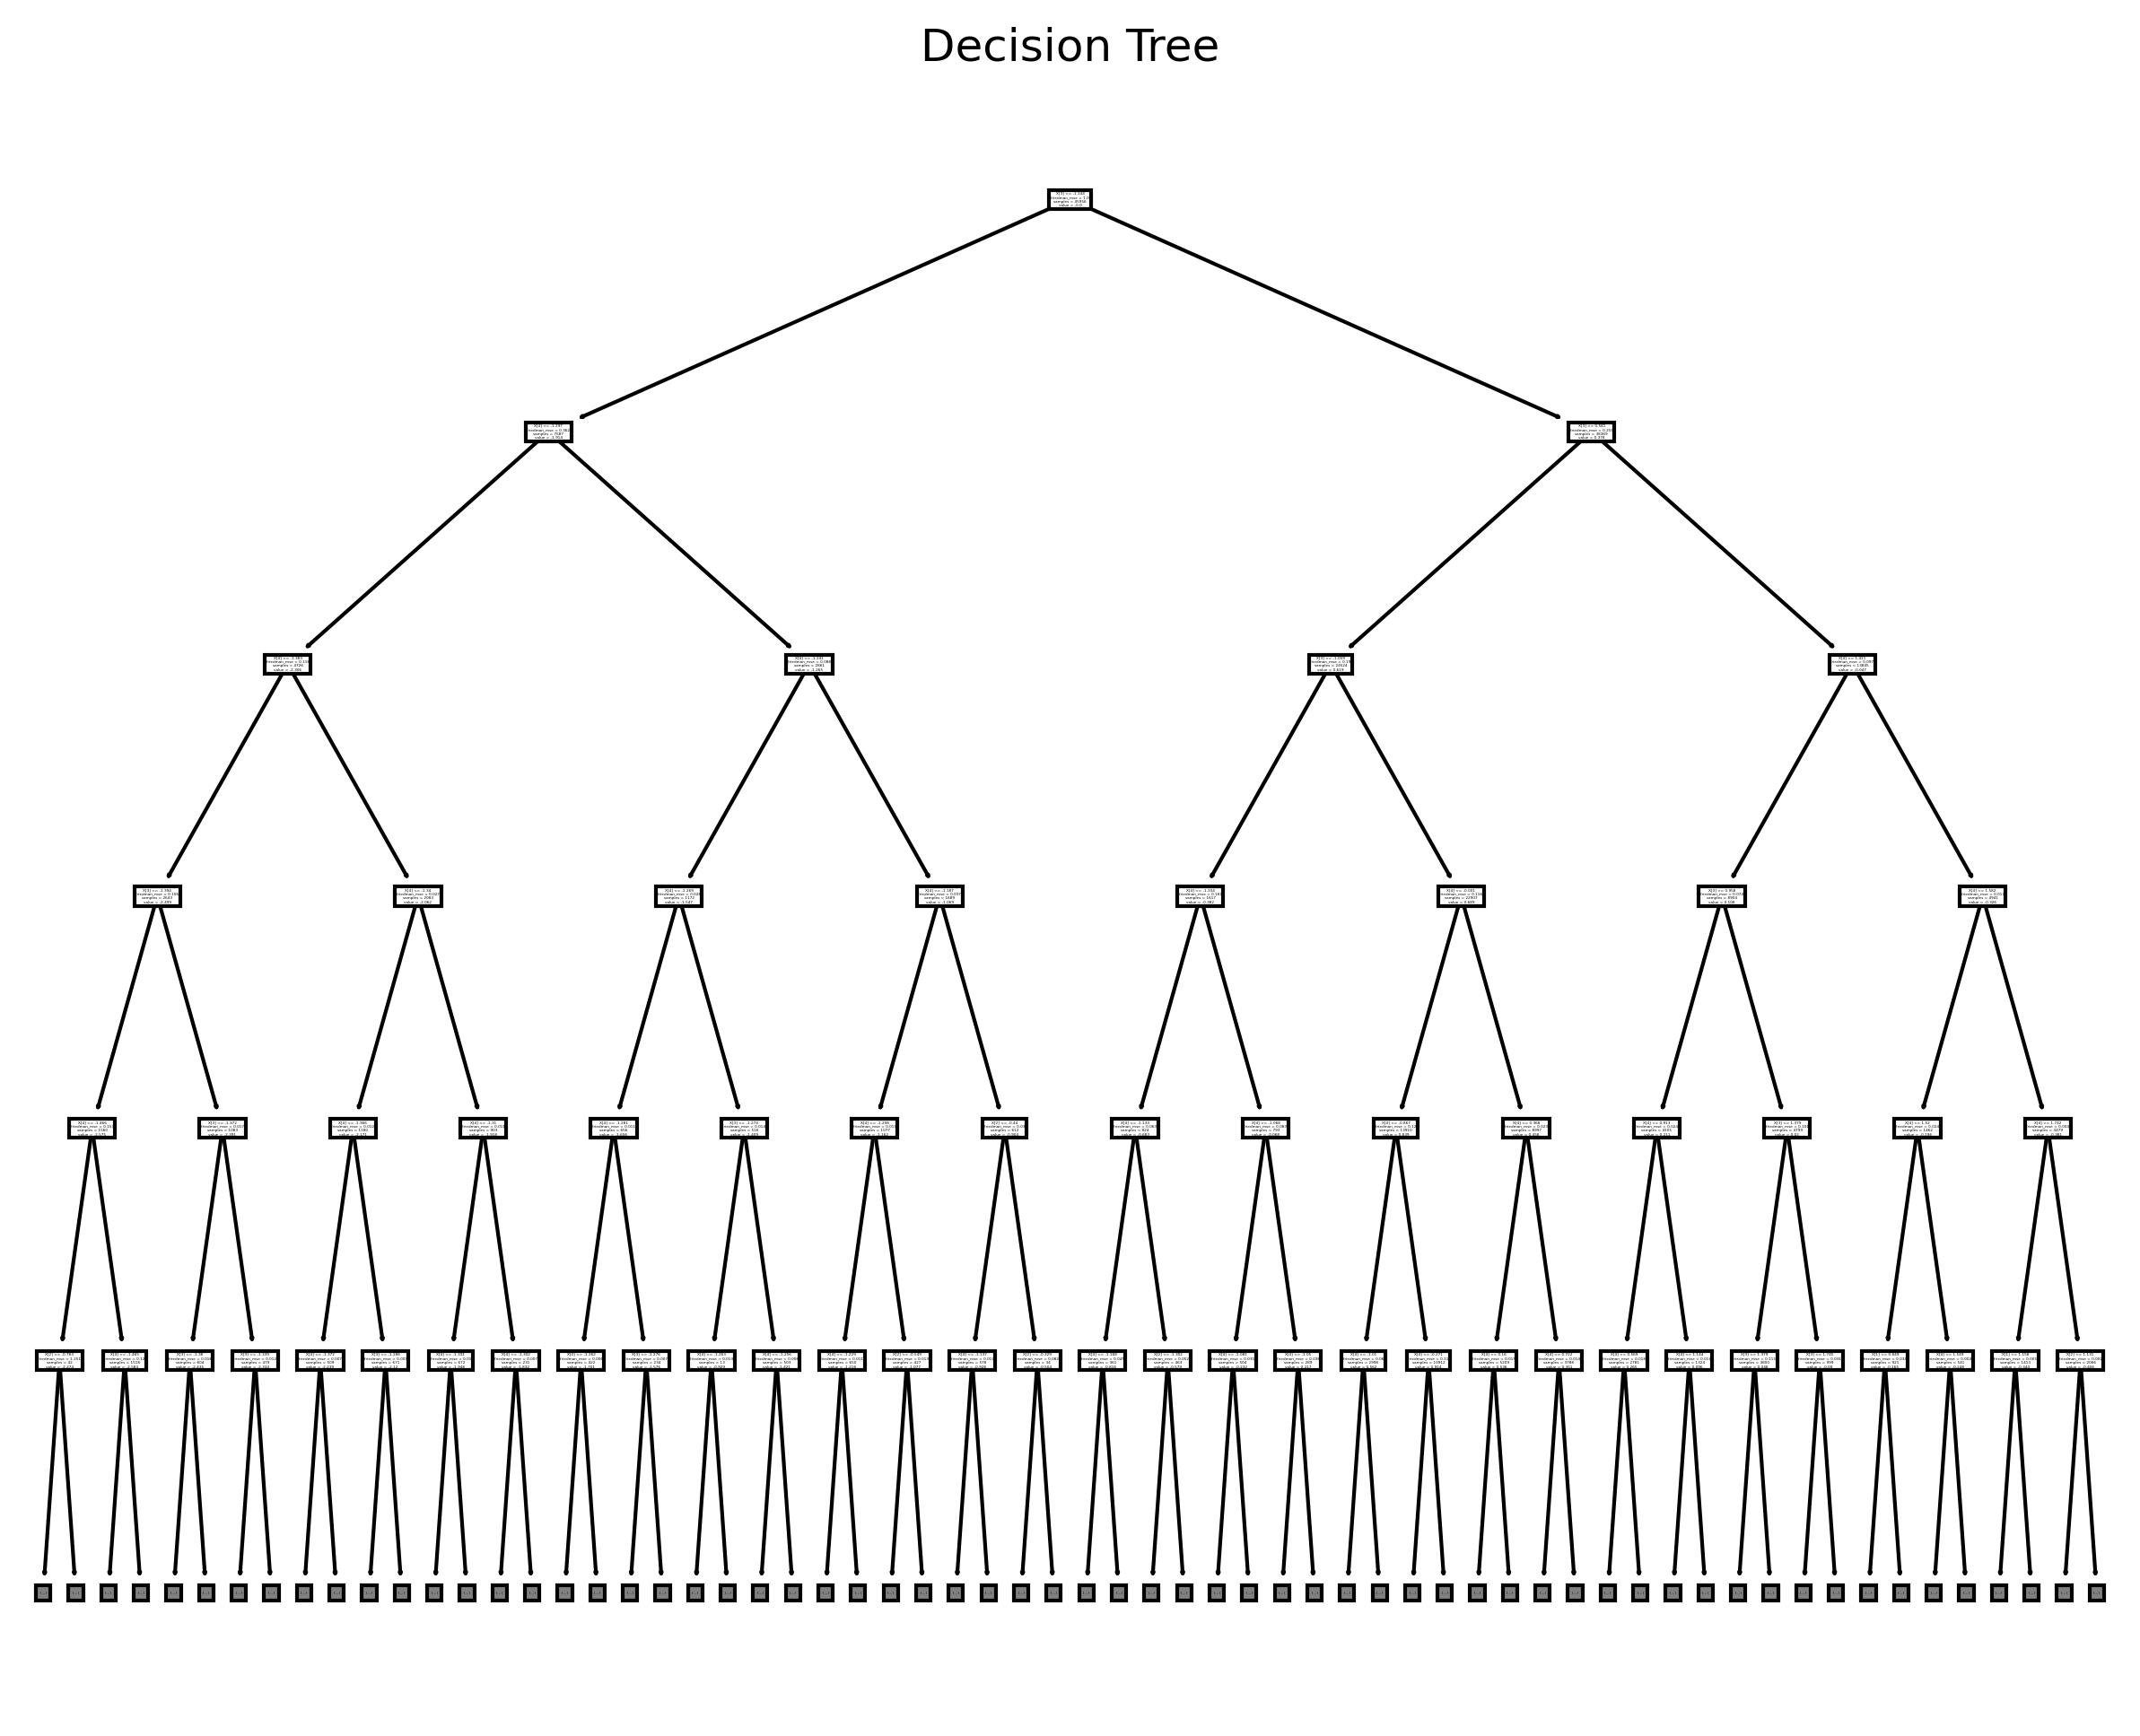

In [176]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
plot_tree(dt_best,
    max_depth=5,
    feature_names=None,
    class_names=None,
    label='all',
    filled=False,
    impurity=True,
    node_ids=False,
    proportion=False,
    rotate='deprecated',
    rounded=False,
    precision=3,
    ax=None,
    fontsize=None)
plt.title('Decision Tree')
plt.savefig('Dtree')

plt.show()

### Insights from The Decision Tree Model:

In [132]:
print('The feature was used for the first split is: IRRADIATION')
print('The number of leaves in the optimal QuAM is: ', dt_best.get_n_leaves())
print('The maximum depth in the optimal Quamis: ', dt_best.max_depth)

The feature was used for the first split is: IRRADIATION
The number of leaves in the optimal QuAM is:  1794
The maximum depth in the optimal Quamis:  12


In [133]:
data_sizes, training_scores, validation_scores = learning_curve(dt_best,X = scaled_X_train, y =scaled_y_train,
                                                    cv=10,error_score=0, scoring='neg_mean_squared_error', train_sizes= np.array([0.1  , 0.325, 0.55 , 0.775, 1.]))


training_mean = - training_scores.mean(axis=1) 
training_standard_deviation = -training_scores.std(axis=1) 

validation_mean = - validation_scores.mean(axis=1) 
validation_standard_deviation =- validation_scores.std(axis=1)



import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean,
                        mode='lines',
                        name='Training',
                        line=dict(color='red')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean - training_standard_deviation,
                        mode='lines',
                        name='Training lower bound',
                        line=dict(width=0, color='red'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean + training_standard_deviation,
                        mode='lines',
                        name='Training upper bound',
                        line=dict(width=0, color='red'),
                        fill='tonexty',
                        fillcolor='rgba(255, 0, 0, 0.3)',
                        showlegend=False))

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean,
                        mode='lines',
                        name='Validation',
                        line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean - validation_standard_deviation,
                        mode='lines',
                        name='Validation lower bound',
                        line=dict(width=0, color='blue'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean + validation_standard_deviation,
                        mode='lines',
                        name='Validation upper bound',
                        line=dict(width=0, color='blue'),
                        fill='tonexty',
                        fillcolor='rgba(0, 0, 255, 0.3)',
                        showlegend=False))

fig.update_layout(title='Learning curve  for The Decision Tree Model',
                 xaxis_title='Dataset size',
                 yaxis_title='Accuracy')
fig.show()

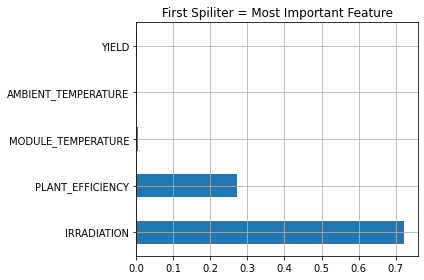

In [134]:
feat_importance = pd.Series(dt_best.feature_importances_, index = X.columns)
feat_importance.nlargest().plot(kind = 'barh')
plt.title('First Spiliter = Most Important Feature')

plt.grid()
plt.tight_layout()
plt.show()

In [145]:
#Scores from dicts_dt:
dicts_dt = {'MAE': 0.39026,'MSE': 0.60622,'RMSE':  0.77860, 'r2_score':  0.39378}
dicts_dt

{'MAE': 0.39026, 'MSE': 0.60622, 'RMSE': 0.7786, 'r2_score': 0.39378}

In [147]:
#Scores from Knn_best
dicts_knn = {'MAE': 0.05272,'MSE': 0.02256,'RMSE':  0.15020,'r2_score': 0.97744}

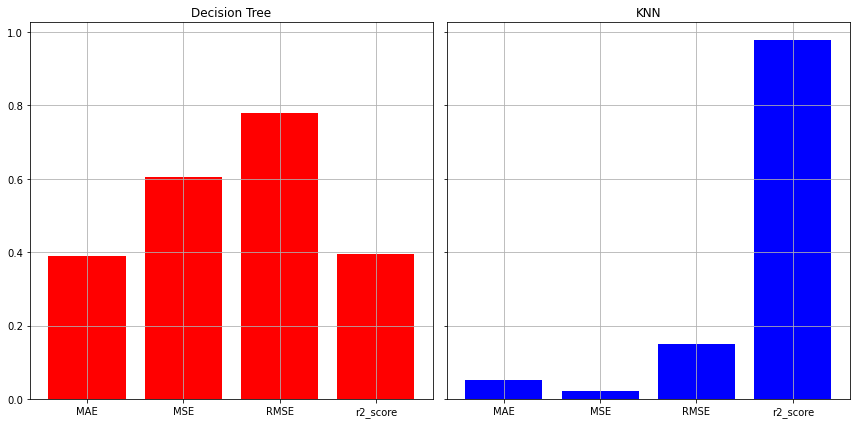

In [148]:
fig, [ax1,ax2] = plt.subplots(1,2, sharey=True, figsize=(12,6))
ax1.bar(*zip(*dicts_dt.items()), color = 'red')
ax1.set_title('Decision Tree')
ax1.grid()

ax2.bar(*zip(*dicts_knn.items()), color = 'blue')
ax2.set_title('KNN')
ax2.grid()

fig.tight_layout()
plt.show()

### Pre-Pruning Automated hyper-tuning for Decision Tree:

In [135]:
dt_criterion_search = GridSearchCV(estimator=DecisionTreeRegressor(), cv=10, 
                              param_grid=dict(criterion=['mse', 'friedman_mse', 'mae'],
                                   splitter=['best', 'random'],
                                   min_samples_split = [2,3],
                                   min_samples_leaf = [2,3],
                                   max_depth=[12,16]))

In [198]:
#dt_criterion_search.fit(scaled_X_train, scaled_y_train)

In [199]:
#dt_criterion_search.best_param_

### Post Pruning:

In [137]:
hyperparameter_grid = {'ccp_alpha': np.linspace(0.0, 0.2, 10)}

In [138]:
search = GridSearchCV(DecisionTreeRegressor(), 
                      hyperparameter_grid,
                      cv=10)

In [140]:
#search.fit(scaled_X_train, scaled_y_train)

In [200]:
#search.predict(scaled_X_train)
#print('accuracy for training dataset: %.5f'% search.score(scaled_X_train, scaled_y_train))
#pred_search = search.predict(scaled_X_test)
#print('accuracy for testing dataset: %.5f'% search.score(scaled_X_test, scaled_y_test))

In [201]:
#print('MAE_PP:  %.5f'% mean_absolute_error(scaled_y_test, pred_search))
#print('MSE_PP: %.5f'% mean_squared_error(scaled_y_test, pred_search))
#print('RMSE_PP: %.5f'% np.sqrt(mean_squared_error(scaled_y_test, pred_search)))
#print('r2_score_PP:  %.5f'% r2_score(scaled_y_test, pred_search))

### Random Forest

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [142]:
#Applying same 'best_params' from Decision Tree. Although a seperate hyper-tuning required for Random Forest
RF = RandomForestRegressor(criterion='friedman_mse',
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=2)

In [143]:
RF.fit(scaled_X_train, scaled_y_train)
RF.predict(scaled_X_train)
print('accuracy for training dataset: %.5f'% RF.score(scaled_X_train, scaled_y_train))
pred_RF = RF.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f'% RF.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.98853
accuracy for testing dataset: 0.40131
Random Forest helped with over-fitting issue, with further tuning, RF could even help further


In [144]:
print('MAE_RF:  %.5f'% mean_absolute_error(scaled_y_test, pred_RF))
print('MSE_RF:  %.5f'% mean_squared_error(scaled_y_test, pred_RF))
print('RMSE_RF: %.5f'% np.sqrt(mean_squared_error(scaled_y_test, pred_RF)))
print('r2_score_RF:  %.5f'% r2_score(scaled_y_test, pred_RF))

MAE_RF:  0.40185
MSE_RF:  0.59869
RMSE_RF: 0.77375
r2_score_RF:  0.40131


In [149]:
dict_RF = {'MAE': 0.40185,'MSE': 0.59869,'RMSE': 0.77375,'r2_score': 0.77375}

In [159]:
data_sizes, training_scores, validation_scores = learning_curve(RF,X = scaled_X_train, y =scaled_y_train,
                                                    cv=10,error_score=0, scoring='neg_mean_squared_error', train_sizes= np.array([0.1  , 0.325, 0.55 , 0.775, 1.]))


training_mean = - training_scores.mean(axis=1) 
training_standard_deviation = -training_scores.std(axis=1) 

validation_mean = - validation_scores.mean(axis=1) 
validation_standard_deviation =- validation_scores.std(axis=1)



import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean,
                        mode='lines',
                        name='Training',
                        line=dict(color='red')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean - training_standard_deviation,
                        mode='lines',
                        name='Training lower bound',
                        line=dict(width=0, color='red'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean + training_standard_deviation,
                        mode='lines',
                        name='Training upper bound',
                        line=dict(width=0, color='red'),
                        fill='tonexty',
                        fillcolor='rgba(255, 0, 0, 0.3)',
                        showlegend=False))

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean,
                        mode='lines',
                        name='Validation',
                        line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean - validation_standard_deviation,
                        mode='lines',
                        name='Validation lower bound',
                        line=dict(width=0, color='blue'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean + validation_standard_deviation,
                        mode='lines',
                        name='Validation upper bound',
                        line=dict(width=0, color='blue'),
                        fill='tonexty',
                        fillcolor='rgba(0, 0, 255, 0.3)',
                        showlegend=False))

fig.update_layout(title='Random Forest Learning curve',
                 xaxis_title='Dataset size',
                 yaxis_title='Accuracy')
fig.show()

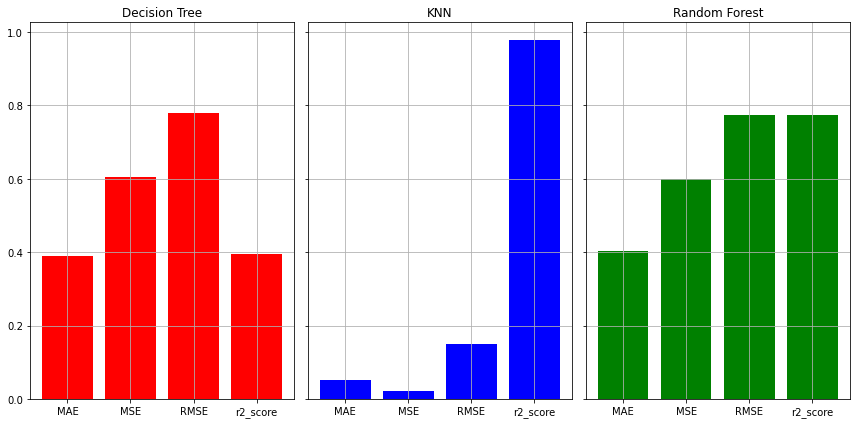

In [150]:
fig, [ax1,ax2, ax3] = plt.subplots(1,3, sharey=True, figsize=(12,6))
ax1.bar(*zip(*dicts_dt.items()), color = 'red')
ax1.set_title('Decision Tree')
ax1.grid()

ax2.bar(*zip(*dicts_knn.items()), color = 'blue')
ax2.set_title('KNN')
ax2.grid()

ax3.bar(*zip(*dict_RF.items()), color = 'green')
ax3.set_title('Random Forest')
ax3.grid()

fig.tight_layout()
plt.show()

### Linear Regression

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
LR = LinearRegression()

In [162]:
LR.fit(scaled_X_train, scaled_y_train)
LR.predict(scaled_X_train)
print('accuracy for training dataset: %.5f' % LR.score(scaled_X_train, scaled_y_train))
pred_LR = LR.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f' % LR.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.83992
accuracy for testing dataset: 0.83922


In [163]:
print('MAE_LR:  %.5f' % mean_absolute_error(scaled_y_test, pred_LR))
print('MSE_LR:  %.5f' % mean_squared_error(scaled_y_test, pred_LR))
print('RMSE_LR: %.5f' % np.sqrt(mean_squared_error(scaled_y_test, pred_LR)))
print('r2_score_LR:  %.5f' % r2_score(scaled_y_test, pred_LR))

MAE_LR:  0.24754
MSE_LR:  0.16078
RMSE_LR: 0.40097
r2_score_LR:  0.83922


In [164]:
dicts_LR = {'MAE': 0.24754,'MSE' : 0.16078,'RMSE' : 0.40097,'r2_score' :  0.83922}

In [157]:
data_sizes, training_scores, validation_scores = learning_curve(LR,X = scaled_X_train, y =scaled_y_train,
                                                    cv=10,error_score=0, scoring='neg_mean_squared_error', train_sizes= np.array([0.1  , 0.325, 0.55 , 0.775, 1.]))


training_mean = - training_scores.mean(axis=1) 
training_standard_deviation = -training_scores.std(axis=1) 

validation_mean = - validation_scores.mean(axis=1) 
validation_standard_deviation =- validation_scores.std(axis=1)



import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean,
                        mode='lines',
                        name='Training',
                        line=dict(color='red')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean - training_standard_deviation,
                        mode='lines',
                        name='Training lower bound',
                        line=dict(width=0, color='red'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=training_mean + training_standard_deviation,
                        mode='lines',
                        name='Training upper bound',
                        line=dict(width=0, color='red'),
                        fill='tonexty',
                        fillcolor='rgba(255, 0, 0, 0.3)',
                        showlegend=False))

fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean,
                        mode='lines',
                        name='Validation',
                        line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean - validation_standard_deviation,
                        mode='lines',
                        name='Validation lower bound',
                        line=dict(width=0, color='blue'),
                        showlegend=False))
fig.add_trace(go.Scatter(x=data_sizes, 
                        y=validation_mean + validation_standard_deviation,
                        mode='lines',
                        name='Validation upper bound',
                        line=dict(width=0, color='blue'),
                        fill='tonexty',
                        fillcolor='rgba(0, 0, 255, 0.3)',
                        showlegend=False))

fig.update_layout(title='Linear Regression Learning curve',
                 xaxis_title='Dataset size',
                 yaxis_title='Accuracy')
fig.show()

### Ridge Regression

In [165]:
from sklearn.linear_model import Ridge

In [166]:
Ridge1 = Ridge()

In [167]:
Ridge1.fit(scaled_X_train, scaled_y_train)
Ridge1.predict(scaled_X_train)
print('accuracy for training dataset: %.5f' % Ridge1.score(scaled_X_train, scaled_y_train))
pred_Ridge = Ridge1.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f' % Ridge1.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.83992
accuracy for testing dataset: 0.83922


In [169]:
print('MAE_LR:  %.5f' % mean_absolute_error(scaled_y_test, pred_Ridge))
print('MSE_LR:  %.5f' % mean_squared_error(scaled_y_test, pred_Ridge))
print('RMSE_LR: %.5f' % np.sqrt(mean_squared_error(scaled_y_test, pred_Ridge)))
print('r2_score_LR:  %.5f' % r2_score(scaled_y_test, pred_Ridge))

MAE_LR:  0.24754
MSE_LR:  0.16078
RMSE_LR: 0.40097
r2_score_LR:  0.83922


#### Ridge Grid Search for Alpha

In [170]:
Ridge_criterion_search = GridSearchCV(estimator=Ridge(), cv=10, 
                              param_grid=dict(alpha = [0.001,0.01,1,10,100]))

In [171]:
Ridge_criterion_search.fit(scaled_X_train, scaled_y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1, 10, 100]})

In [172]:
Ridge_criterion_search.predict(scaled_X_train)
print('accuracy for training dataset: %.5f' % Ridge_criterion_search.score(scaled_X_train, scaled_y_train))
pred_Ridge_criterion_search = Ridge_criterion_search.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f' % Ridge_criterion_search.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.83992
accuracy for testing dataset: 0.83922


In [173]:
Ridge_criterion_search.best_params_

{'alpha': 10}

In [175]:
print('MAE_Ridge:  %.5f' % mean_absolute_error(scaled_y_test, pred_Ridge_criterion_search))
print('MSE_Ridge:  %.5f' % mean_squared_error(scaled_y_test, pred_Ridge_criterion_search))
print('RMSE_Ridge: %.5f' % np.sqrt(mean_squared_error(scaled_y_test, pred_Ridge_criterion_search)))
print('r2_score_Ridge:  %.5f' % r2_score(scaled_y_test, pred_Ridge_criterion_search))

MAE_Ridge:  0.24754
MSE_Ridge:  0.16078
RMSE_Ridge: 0.40097
r2_score_Ridge:  0.83922


In [176]:
dicts_Ridge = {'MAE': 0.24754,'MSE' : 0.16078,'RMSE' : 0.40097, 'r2_score' :  0.83922}

### Lasso Regression

In [177]:
from sklearn.linear_model import Lasso

In [178]:
Lasso1 = Lasso()

In [179]:
Lasso1.fit(scaled_X_train, scaled_y_train)
Lasso1.predict(scaled_X_train)
print('accuracy for training dataset: ', Lasso1.score(scaled_X_train, scaled_y_train))
pred_Lasso1 = Lasso1.predict(scaled_X_test)
print('accuracy for testing dataset: ', Lasso1.score(scaled_X_test, scaled_y_test))

accuracy for training dataset:  0.0
accuracy for testing dataset:  0.0


In [183]:
print('MAE_Lasso:  %.5f' % mean_absolute_error(scaled_y_test, pred_Lasso1))
print('MSE_Lasso:  %.5f' % mean_squared_error(scaled_y_test, pred_Lasso1))
print('RMSE_Lasso: %.5f' % np.sqrt(mean_squared_error(scaled_y_test, pred_Lasso1)))
print('r2_score_Lasso: %.5f' % r2_score(scaled_y_test, pred_Lasso1))

MAE_Lasso:  0.84750
MSE_Lasso:  1.00000
RMSE_Lasso: 1.00000
r2_score_Lasso: 0.00000


#### Lasso Grid Search for Alpha

In [181]:
Lasso_criterion_search = GridSearchCV(estimator=Lasso(), cv=10, 
                              param_grid=dict(alpha = [0.000001, 0.00001, 0.0001, 0.001,0.01,1]))

In [184]:
Lasso_criterion_search.fit(scaled_X_train, scaled_y_train)
Lasso_criterion_search.predict(scaled_X_train)
print('accuracy for training dataset: %.5f' % Lasso_criterion_search.score(scaled_X_train, scaled_y_train))
pred_Lasso_criterion_search = Lasso_criterion_search.predict(scaled_X_test)
print('accuracy for testing dataset: %.5f' % Lasso_criterion_search.score(scaled_X_test, scaled_y_test))

accuracy for training dataset: 0.83992
accuracy for testing dataset: 0.83922


In [186]:
Lasso_criterion_search.best_params_

{'alpha': 1e-06}

In [187]:
print('MAE_L:  %.5f' % mean_absolute_error(scaled_y_test, pred_Lasso_criterion_search))
print('MSE_L:  %.5f' % mean_squared_error(scaled_y_test, pred_Lasso_criterion_search))
print('RMSE_L: %.5f' % np.sqrt(mean_squared_error(scaled_y_test, pred_Lasso_criterion_search)))
print('r2_score_L:  %.5f' % r2_score(scaled_y_test, pred_Lasso_criterion_search))

MAE_L:  0.24754
MSE_L:  0.16078
RMSE_L: 0.40097
r2_score_L:  0.83922


In [188]:
LassoB = Lasso(alpha = 1e-05)
LassoB.fit(scaled_X_train, scaled_y_train)
LassoB.predict(scaled_X_train)
print('accuracy for training dataset: ', LassoB.score(scaled_X_train, scaled_y_train))
pred_LassoB = LassoB.predict(scaled_X_test)
print('accuracy for testing dataset: ', LassoB.score(scaled_X_test, scaled_y_test))
print('MAE_LB:  %.5f' % mean_absolute_error(scaled_y_test, pred_LassoB))
print('MSE_LB:  %.5f' % mean_squared_error(scaled_y_test, pred_LassoB))
print('RMSE_LB: %.5f' % np.sqrt(mean_squared_error(scaled_y_test, pred_LassoB)))
print('r2_score_LB: %.5f' % r2_score(scaled_y_test, pred_LassoB))

accuracy for training dataset:  0.8399215092200664
accuracy for testing dataset:  0.8392214425933509
MAE_LB:  0.24754
MSE_LB:  0.16078
RMSE_LB: 0.40097
r2_score_LB: 0.83922


In [189]:
dicts_Lasso = {'MAE': 0.24754,'MSE' : 0.16078,'RMSE' : 0.40097,'r2_score' :  0.83922}

### Comparison among the various Learning Algorithms

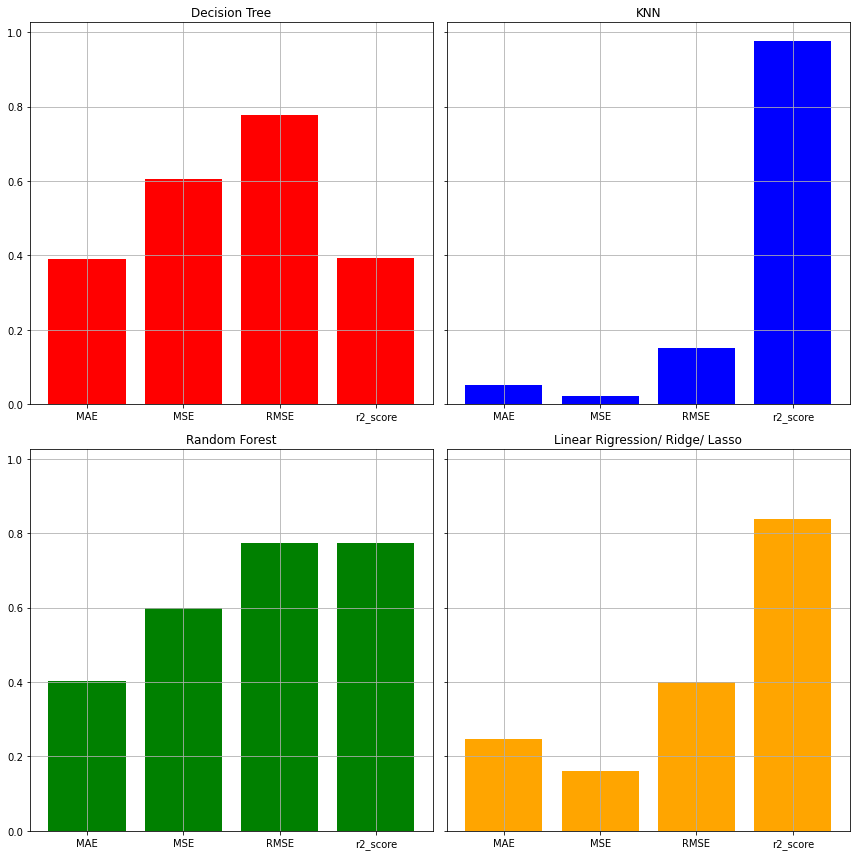

In [193]:
fig, [(ax1,ax2), (ax3,ax4)] = plt.subplots(2,2, sharey=True, figsize=(12,12))

ax1.bar(*zip(*dicts_dt.items()), color = 'red')
ax1.set_title('Decision Tree')
ax1.grid()

ax2.bar(*zip(*dicts_knn.items()), color = 'blue')
ax2.set_title('KNN')
ax2.grid()

ax3.bar(*zip(*dict_RF.items()), color = 'green')
ax3.set_title('Random Forest')
ax3.grid()

ax4.bar(*zip(*dicts_LR.items()), color = 'orange')
ax4.set_title('Linear Rigression/ Ridge/ Lasso')
ax4.grid()


fig.tight_layout()
plt.show()

### Thank You!